# 0 - Importing the main libraries needed

In [32]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# I- Loading the geographical data and creating a map of Paris

## 1. Uploading the geospatial data

In [33]:
df_paris_geospatial= pd.read_csv("F:\Dell Backup 03122018\Desktop Files Dell\IBM Data Science Certificate\Course 9 Applied Data Science Capstone\My Capstone project\Arrondissements_data_Paris.csv", index_col = "Arrondissement_Index", dtype={'leading_zero_column_name': object})
df_paris_geospatial

,Arrondissement_Number,Arrondissement_Name,Latitude,Longitude
Arrondissement_Index,,,,
15,15eme Ardt,Vaugirard,48.840085,2.292826
10,10eme Ardt,Entrepot,48.876130,2.360728
16,16eme Ardt,Passy,48.860392,2.261971
2,2eme Ardt,Bourse,48.868279,2.342803
17,17eme Ardt,Batignolles-Monceau,48.887327,2.306777
1,1er Ardt,Louvre,48.862563,2.336443
4,4eme Ardt,Hotel-de-Ville,48.854341,2.357630
8,8eme Ardt,Elysee,48.872721,2.312554
18,18eme Ardt,Buttes-Montmartre,48.892569,2.348161


## 2. Creating a map of Paris, its *arrondissements* and the main touristic sites visited in 2018

In [34]:
address = 'Paris, France'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [35]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12, width=1000, height=500, control_scale=True)

map_paris


# add markers to map
for lat, lng, Arrondissement_Number, Arrondissement_Name in zip(df_paris_geospatial['Latitude'], df_paris_geospatial['Longitude'], df_paris_geospatial['Arrondissement_Number'], df_paris_geospatial['Arrondissement_Name']):
    label = '{}, {}'.format(Arrondissement_Name, Arrondissement_Number)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  

    # get location information for address
#address1 = geocoder.osm('6 Parvis Notre-Dame - Pl. Jean-Paul II, Paris')
address1 = '6 Parvis Notre-Dame - Pl. Jean-Paul II, Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address1)
latitude_CATHNTRDAME = location.latitude
longitude_CATHNTRDAME = location.longitude
address_latlng = [latitude_CATHNTRDAME, longitude_CATHNTRDAME]
folium.Marker(address_latlng, popup='Cathedrale Notre Dame').add_to(map_paris)

address2 = '35 Rue du Chevalier de la Barre, 75018 Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address2)
latitude2= location.latitude
longitude2 = location.longitude
address_latlng = [latitude2, longitude2]
folium.Marker(address_latlng, popup='Basilique du Sacre-Coeur de Montmartre ').add_to(map_paris)


address3 = 'Rue de Rivoli, 75001 Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address3)
latitude3= location.latitude
longitude3 = location.longitude
address_latlng = [latitude3, longitude3]
folium.Marker(address_latlng, popup=' Musee du Louvre ').add_to(map_paris)


address4 = '5 Avenue Anatole France, 75007 Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address4)
latitude4= location.latitude
longitude4 = location.longitude
address_latlng = [latitude4, longitude4]
folium.Marker(address_latlng, popup='Tour Eiffel').add_to(map_paris)


address5 = ' Place Georges-Pompidou, 75004 Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address5)
latitude5= location.latitude
longitude5 = location.longitude
address_latlng = [latitude5, longitude5]
folium.Marker(address_latlng, popup='Centre Georges-Pompidou').add_to(map_paris)

          


map_paris

In [36]:



   
address8 = '140 Rue du Bac, 75007 Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address8)
latitude8= location.latitude
longitude8 = location.longitude
address_latlng = [latitude8, longitude8]
folium.Marker(address_latlng, popup='Chapelle Notre-Dame-de-la-Medaille-miraculeuse').add_to(map_paris)

address9 = '57 Rue Cuvier, 75005 Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address9)
latitude9= location.latitude
longitude9 = location.longitude
address_latlng = [latitude9, longitude9]
folium.Marker(address_latlng, popup='Jardin des plantes de Paris').add_to(map_paris)

address10 = 'Place Charles de Gaulle, 75008 Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address10)
latitude10= location.latitude
longitude10 = location.longitude
address_latlng = [latitude10, longitude10]
folium.Marker(address_latlng, popup='Arc de triomphe').add_to(map_paris)

address11 = '3 Avenue du Général Eisenhower, 75008 Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address11)
latitude11= location.latitude
longitude11 = location.longitude
address_latlng = [latitude11, longitude11]
folium.Marker(address_latlng, popup='Galeries Nationales du Grand Palais').add_to(map_paris)

              
address12 = '129 Rue de Grenelle, 75007 Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address12)
latitude12= location.latitude
longitude12 = location.longitude
address_latlng = [latitude12, longitude12]
folium.Marker(address_latlng, popup='Hotel des Invalides').add_to(map_paris)

              
address13 = '33 Avenue du Maine, 75015 Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address13)
latitude13= location.latitude
longitude13 = location.longitude
address_latlng = [latitude13, longitude13]
folium.Marker(address_latlng, popup='Tour Montparnasse').add_to(map_paris) 



map_paris

address6 = '1 Rue de la Légion dHonneur, 75007 Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address6)
latitude6= location.latitude
longitude6 = location.longitude
address_latlng = [latitude6, longitude6]
folium.Marker(address_latlng, popup="Musee d'Orsay").add_to(map_paris)
              
address7 = '30 Avenue Corentin Cariou, 75019 Paris'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address7)
latitude7= location.latitude
longitude7 = location.longitude
address_latlng = [latitude7, longitude7]
folium.Marker(address_latlng, popup= "Cite des sciences et de l'industrie").add_to(map_paris)

In [37]:
#### export the map
#map_paris.save('Desktop\map_paris3.html')

# 3. Exploring Paris venues through Foursquare

### 1. Exploring and having a sense of all the venues 

In [38]:
CLIENT_ID = '1MEEHMTBDTVNCXPZSLJ2EQW4TX12SFBR4DW3YKBVCTE5TIRX' # your Foursquare ID
CLIENT_SECRET = 'P52XNGKQPNCR3TS1FLDIBDCAP4PGBDDZ4JADHIGA2OMLTAD4' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1MEEHMTBDTVNCXPZSLJ2EQW4TX12SFBR4DW3YKBVCTE5TIRX
CLIENT_SECRET:P52XNGKQPNCR3TS1FLDIBDCAP4PGBDDZ4JADHIGA2OMLTAD4


In [39]:
## defining the radius and limit of venues to get
#search_query = 'Bar'
radius=500
LIMIT=500

In [40]:
# Exploring the nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            #search_query,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
paris_venues = getNearbyVenues(names=df_paris_geospatial['Arrondissement_Number'],
                                   latitudes=df_paris_geospatial['Latitude'],
                                   longitudes=df_paris_geospatial['Longitude']
                                  )
paris_venues.head(10)

15eme Ardt
10eme Ardt
16eme Ardt
2eme Ardt
17eme Ardt
1er Ardt
4eme Ardt
8eme Ardt
18eme Ardt
11eme Ardt
13eme Ardt
3eme Ardt
14eme Ardt
20eme Ardt
5eme Ardt
6eme Ardt
12eme Ardt
7eme Ardt
9eme Ardt
19eme Ardt


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,15eme Ardt,48.840085,2.292826,Le Grand Venise,48.838276,2.294484,Italian Restaurant
1,15eme Ardt,48.840085,2.292826,Indian Villa,48.841116,2.291621,Indian Restaurant
2,15eme Ardt,48.840085,2.292826,La Table Libanaise,48.841766,2.288607,Lebanese Restaurant
3,15eme Ardt,48.840085,2.292826,CrossFit Lutèce,48.840888,2.292199,Gym
4,15eme Ardt,48.840085,2.292826,AlKaram,48.838379,2.297156,Lebanese Restaurant
5,15eme Ardt,48.840085,2.292826,Square Saint-Lambert,48.842343,2.297108,Park
6,15eme Ardt,48.840085,2.292826,Amorino,48.844064,2.293377,Ice Cream Shop
7,15eme Ardt,48.840085,2.292826,Les Trois Garçons,48.841354,2.291299,French Restaurant
8,15eme Ardt,48.840085,2.292826,Afaria,48.836049,2.291783,Basque Restaurant
9,15eme Ardt,48.840085,2.292826,Hôtel Mercure Paris 15 Porte de Versailles,48.838372,2.290500,Hotel


In [42]:
paris_venues.shape

(1356, 7)

In [43]:
paris_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,68,68,68,68,68,68
12eme Ardt,5,5,5,5,5,5
13eme Ardt,60,60,60,60,60,60
14eme Ardt,29,29,29,29,29,29
15eme Ardt,63,63,63,63,63,63
16eme Ardt,12,12,12,12,12,12
17eme Ardt,58,58,58,58,58,58
18eme Ardt,46,46,46,46,46,46


In [44]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 202 uniques categories.


In [45]:
paris_venues['Neighborhood'].value_counts()

2eme Ardt     100
10eme Ardt    100
7eme Ardt     100
3eme Ardt     100
4eme Ardt     100
1er Ardt      100
9eme Ardt     100
5eme Ardt      99
11eme Ardt     68
6eme Ardt      67
15eme Ardt     63
13eme Ardt     60
8eme Ardt      58
17eme Ardt     58
20eme Ardt     48
18eme Ardt     46
19eme Ardt     43
14eme Ardt     29
16eme Ardt     12
12eme Ardt      5
Name: Neighborhood, dtype: int64

## 2. Here is the list of the venues categories

In [46]:
paris_venues['Venue Category'].unique()

array(['Italian Restaurant', 'Indian Restaurant', 'Lebanese Restaurant',
       'Gym', 'Park', 'Ice Cream Shop', 'French Restaurant',
       'Basque Restaurant', 'Hotel', 'Health & Beauty Service',
       'Sports Bar', 'Hotel Bar', 'Russian Restaurant', 'Restaurant',
       'Hostel', 'Plaza', 'Persian Restaurant', 'Thai Restaurant',
       'Scandinavian Restaurant', 'Brasserie', 'Japanese Restaurant',
       'Bakery', 'Bistro', 'Irish Pub', 'Arts & Crafts Store',
       'Sandwich Place', 'Coffee Shop', 'Moroccan Restaurant',
       'Supermarket', 'Seafood Restaurant', 'Cocktail Bar', 'Baby Store',
       'Bus Stop', "Women's Store", 'Mediterranean Restaurant', 'Café',
       'Food & Drink Shop', 'Creperie', 'Shanxi Restaurant',
       'African Restaurant', 'Flower Shop', 'Taco Place', 'Garden',
       'Boxing Gym', 'Pizza Place', 'Breakfast Spot', 'Bookstore',
       'Salad Place', 'Burger Joint', 'Vegetarian / Vegan Restaurant',
       'Korean Restaurant', 'Spanish Restaurant', 'Juice

# 3. Filtering only data related to 1) Nightlife in Paris -- i.e. bars, pubs, brasseries, etc. I also include restaurants as these are indirect detractors; 2) Other activities by night; 3) Hotels; and 4) Museums 

### 3.1 Filtering the above mentioned venues

In [47]:
import re
paris_venues_Nightlife_Hotels_Museums = paris_venues.loc[(paris_venues['Venue Category'].str.contains('Bar|Pub|Brasserie|Bistro|Brewery|Nightclub|Beer Garden|Gastropub|Lounge|Restaurant|Diner|Creperie|Fish & Chips Shop|Snack Place|Tea Room|Theater|Comedy Club|Hotel|Motel|History Museum|Movie Theater|Monument / Landmark', flags = re.I, regex = True))]
paris_venues_Nightlife_Hotels_Museums

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,15eme Ardt,48.840085,2.292826,Le Grand Venise,48.838276,2.294484,Italian Restaurant
1,15eme Ardt,48.840085,2.292826,Indian Villa,48.841116,2.291621,Indian Restaurant
2,15eme Ardt,48.840085,2.292826,La Table Libanaise,48.841766,2.288607,Lebanese Restaurant
4,15eme Ardt,48.840085,2.292826,AlKaram,48.838379,2.297156,Lebanese Restaurant
7,15eme Ardt,48.840085,2.292826,Les Trois Garçons,48.841354,2.291299,French Restaurant
8,15eme Ardt,48.840085,2.292826,Afaria,48.836049,2.291783,Basque Restaurant
9,15eme Ardt,48.840085,2.292826,Hôtel Mercure Paris 15 Porte de Versailles,48.838372,2.290500,Hotel
10,15eme Ardt,48.840085,2.292826,Arti,48.841016,2.297283,Indian Restaurant
12,15eme Ardt,48.840085,2.292826,Le Comptoir,48.835645,2.293037,Sports Bar
13,15eme Ardt,48.840085,2.292826,Bacco,48.843619,2.294476,Italian Restaurant


In [48]:
paris_venues_Nightlife_Hotels_Museums.shape

(817, 7)

In [50]:
print('There are {} uniques categories for Paris nightlife venues.'.format(len(paris_venues_Nightlife_Hotels_Museums['Venue Category'].unique())))

There are 90 uniques categories for Paris nightlife venues.


In [51]:
paris_venues_Nightlife_Hotels_Museums['Neighborhood'].value_counts()

9eme Ardt     73
2eme Ardt     67
7eme Ardt     66
10eme Ardt    63
5eme Ardt     62
4eme Ardt     53
1er Ardt      46
13eme Ardt    46
15eme Ardt    43
11eme Ardt    42
3eme Ardt     42
17eme Ardt    40
8eme Ardt     38
6eme Ardt     34
18eme Ardt    29
20eme Ardt    26
19eme Ardt    24
14eme Ardt    21
12eme Ardt     1
16eme Ardt     1
Name: Neighborhood, dtype: int64

In [52]:
print(paris_venues_Nightlife_Hotels_Museums.index)

Int64Index([   0,    1,    2,    4,    7,    8,    9,   10,   12,   13,
            ...
            1335, 1336, 1338, 1340, 1341, 1343, 1345, 1346, 1347, 1348],
           dtype='int64', length=817)


In [53]:
paris_venues_Nightlife_Hotels_Museums_counts = paris_venues_Nightlife_Hotels_Museums['Neighborhood'].value_counts()

In [54]:
print(paris_venues_Nightlife_Hotels_Museums_counts.index)

Index(['9eme Ardt', '2eme Ardt', '7eme Ardt', '10eme Ardt', '5eme Ardt',
       '4eme Ardt', '1er Ardt', '13eme Ardt', '15eme Ardt', '11eme Ardt',
       '3eme Ardt', '17eme Ardt', '8eme Ardt', '6eme Ardt', '18eme Ardt',
       '20eme Ardt', '19eme Ardt', '14eme Ardt', '12eme Ardt', '16eme Ardt'],
      dtype='object')


In [55]:
paris_venues_Nightlife_Hotels_Museums_counts_df = paris_venues_Nightlife_Hotels_Museums_counts.to_frame()
paris_venues_Nightlife_Hotels_Museums_counts_df

,Neighborhood
9eme Ardt,73
2eme Ardt,67
7eme Ardt,66
10eme Ardt,63
5eme Ardt,62
4eme Ardt,53
1er Ardt,46
13eme Ardt,46
15eme Ardt,43
11eme Ardt,42


In [56]:
type(paris_venues_Nightlife_Hotels_Museums_counts_df)

pandas.core.frame.DataFrame

In [57]:
paris_venues_Nightlife_Hotels_Museums_counts_df

,Neighborhood
9eme Ardt,73
2eme Ardt,67
7eme Ardt,66
10eme Ardt,63
5eme Ardt,62
4eme Ardt,53
1er Ardt,46
13eme Ardt,46
15eme Ardt,43
11eme Ardt,42


In [58]:
paris_venues_Nightlife_Hotels_Museums_counts_df.columns

Index(['Neighborhood'], dtype='object')

### We notice that some of the *arrondissements*, the 12th and 16th have only one rated venue accross the various categories considered from Foursquare

### Note that the *paris_venues_Nightlife_Hotels_Museums_counts_df* index will be used as the common index to be applied to the Nightlife partial components, as well as the museums and hotels categories. Let's display it

In [59]:
paris_venues_Nightlife_Hotels_Museums_counts_df.index

Index(['9eme Ardt', '2eme Ardt', '7eme Ardt', '10eme Ardt', '5eme Ardt',
       '4eme Ardt', '1er Ardt', '13eme Ardt', '15eme Ardt', '11eme Ardt',
       '3eme Ardt', '17eme Ardt', '8eme Ardt', '6eme Ardt', '18eme Ardt',
       '20eme Ardt', '19eme Ardt', '14eme Ardt', '12eme Ardt', '16eme Ardt'],
      dtype='object')

Let's take a graphical look on these counts

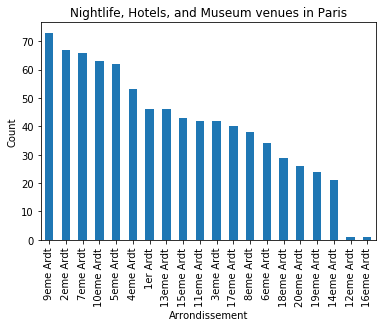

In [60]:
paris_venues_Nightlife_Hotels_Museums_counts_df.plot(kind='bar', legend=False)
plt.title('Nightlife, Hotels, and Museum venues in Paris')
plt.xlabel('Arrondissement')
plt.ylabel('Count')
plt.show()

### 3.2 Distinguishing Bars and restaurants, then the hotels, and the museums

### 3.2.1 The *Bars* category

In [61]:
paris_venues_Nightlife_Bars = paris_venues.loc[(paris_venues['Venue Category'].str.contains('Bar|Pub|Brasserie|Bistro|Brewery|Nightclub|Beer Garden|Gastropub|Lounge', flags = re.I, regex = True))]
paris_bars_counts = paris_venues_Nightlife_Bars['Neighborhood'].value_counts()
paris_bars_counts


2eme Ardt     21
9eme Ardt     18
10eme Ardt    15
5eme Ardt     14
3eme Ardt     13
18eme Ardt    12
4eme Ardt     12
11eme Ardt    12
6eme Ardt     10
7eme Ardt      9
19eme Ardt     9
20eme Ardt     8
8eme Ardt      7
15eme Ardt     7
1er Ardt       6
17eme Ardt     4
14eme Ardt     3
13eme Ardt     3
Name: Neighborhood, dtype: int64

### Reordering the bars counts dataframe using the *paris_venues_Nightlife_Hotels_Museums_counts* as a common index.

In [62]:
paris_bars_counts = paris_bars_counts.reindex(paris_venues_Nightlife_Hotels_Museums_counts_df.index)
paris_bars_counts

9eme Ardt     18.0
2eme Ardt     21.0
7eme Ardt      9.0
10eme Ardt    15.0
5eme Ardt     14.0
4eme Ardt     12.0
1er Ardt       6.0
13eme Ardt     3.0
15eme Ardt     7.0
11eme Ardt    12.0
3eme Ardt     13.0
17eme Ardt     4.0
8eme Ardt      7.0
6eme Ardt     10.0
18eme Ardt    12.0
20eme Ardt     8.0
19eme Ardt     9.0
14eme Ardt     3.0
12eme Ardt     NaN
16eme Ardt     NaN
Name: Neighborhood, dtype: float64

### Notice Python automatically creates a row for the indices from *paris_venues_Nightlife_counts* that contain no data in the *paris_bars_counts*, in this case the 12th and 16th arrondissement. 

In [63]:
#converting it to a dataframe
paris_bars_counts_df = paris_bars_counts.to_frame()
type(paris_bars_counts_df)
paris_bars_counts_df.shape

(20, 1)

### 3.2.2 The *Restaurants* category

### I then extract the restaurant venues and reorder them as well.

In [69]:
paris_venues_Nightlife_Restaurants = paris_venues.loc[(paris_venues['Venue Category'].str.contains('Restaurant|Diner|Creperie|Fish & Chips Shop|Snack Place|Tea Room', flags = re.I, regex = True))]
paris_restaurants_counts = paris_venues_Nightlife_Restaurants['Neighborhood'].value_counts()
paris_restaurants_counts

9eme Ardt     44
13eme Ardt    43
10eme Ardt    43
5eme Ardt     39
2eme Ardt     38
4eme Ardt     38
7eme Ardt     34
1er Ardt      31
17eme Ardt    28
11eme Ardt    28
15eme Ardt    28
3eme Ardt     27
8eme Ardt     23
6eme Ardt     21
20eme Ardt    15
14eme Ardt    15
18eme Ardt    14
19eme Ardt    13
16eme Ardt     1
Name: Neighborhood, dtype: int64

### Reordering the dataframe

In [70]:
paris_restaurants_counts = paris_restaurants_counts.reindex(paris_venues_Nightlife_Hotels_Museums_counts_df.index)
paris_restaurants_counts


9eme Ardt     44.0
2eme Ardt     38.0
7eme Ardt     34.0
10eme Ardt    43.0
5eme Ardt     39.0
4eme Ardt     38.0
1er Ardt      31.0
13eme Ardt    43.0
15eme Ardt    28.0
11eme Ardt    28.0
3eme Ardt     27.0
17eme Ardt    28.0
8eme Ardt     23.0
6eme Ardt     21.0
18eme Ardt    14.0
20eme Ardt    15.0
19eme Ardt    13.0
14eme Ardt    15.0
12eme Ardt     NaN
16eme Ardt     1.0
Name: Neighborhood, dtype: float64

In [71]:
paris_restaurants_counts_df = paris_restaurants_counts.to_frame()
type(paris_restaurants_counts_df)
paris_restaurants_counts_df.shape

(20, 1)

In [72]:
paris_restaurants_counts_df.columns


Index(['Neighborhood'], dtype='object')

### 3.2.3 The *Theaters and Comedy clubs* category

### Next extracting the theaters and comedy clubs visited and commented upon by tourists

In [73]:
paris_venues_Nightlife_Theaters = paris_venues.loc[(paris_venues['Venue Category'].str.contains('Theater|Comedy Club|Movie Theater', flags = re.I, regex = True))]
paris_Theaters_counts = paris_venues_Nightlife_Theaters['Neighborhood'].value_counts()
paris_Theaters_counts

2eme Ardt     4
5eme Ardt     2
9eme Ardt     2
1er Ardt      2
20eme Ardt    2
6eme Ardt     2
11eme Ardt    2
8eme Ardt     1
18eme Ardt    1
Name: Neighborhood, dtype: int64

### Following is the reordering of the Theaters dataframe

In [74]:
paris_Theaters_counts = paris_Theaters_counts.reindex(paris_venues_Nightlife_Hotels_Museums_counts_df.index)
paris_Theaters_counts

9eme Ardt     2.0
2eme Ardt     4.0
7eme Ardt     NaN
10eme Ardt    NaN
5eme Ardt     2.0
4eme Ardt     NaN
1er Ardt      2.0
13eme Ardt    NaN
15eme Ardt    NaN
11eme Ardt    2.0
3eme Ardt     NaN
17eme Ardt    NaN
8eme Ardt     1.0
6eme Ardt     2.0
18eme Ardt    1.0
20eme Ardt    2.0
19eme Ardt    NaN
14eme Ardt    NaN
12eme Ardt    NaN
16eme Ardt    NaN
Name: Neighborhood, dtype: float64

### 3.4 The *Hotels* category

### The next dataframe I filter is that of Hotels and Motels

In [75]:
paris_venues_Hotels = paris_venues.loc[(paris_venues['Venue Category'].str.contains('Hotel|Motel', flags = re.I, regex = True))]
paris_venues_Hotels_counts = paris_venues_Hotels['Neighborhood'].value_counts()
paris_venues_Hotels_counts

7eme Ardt     20
15eme Ardt     9
9eme Ardt      9
8eme Ardt      8
17eme Ardt     8
1er Ardt       7
5eme Ardt      6
10eme Ardt     5
2eme Ardt      5
14eme Ardt     3
4eme Ardt      3
19eme Ardt     2
18eme Ardt     2
6eme Ardt      1
3eme Ardt      1
20eme Ardt     1
Name: Neighborhood, dtype: int64

### Which I reorder

In [76]:
paris_venues_Hotels_counts = paris_venues_Hotels_counts.reindex(paris_venues_Nightlife_Hotels_Museums_counts_df.index)
paris_venues_Hotels_counts

9eme Ardt      9.0
2eme Ardt      5.0
7eme Ardt     20.0
10eme Ardt     5.0
5eme Ardt      6.0
4eme Ardt      3.0
1er Ardt       7.0
13eme Ardt     NaN
15eme Ardt     9.0
11eme Ardt     NaN
3eme Ardt      1.0
17eme Ardt     8.0
8eme Ardt      8.0
6eme Ardt      1.0
18eme Ardt     2.0
20eme Ardt     1.0
19eme Ardt     2.0
14eme Ardt     3.0
12eme Ardt     NaN
16eme Ardt     NaN
Name: Neighborhood, dtype: float64

### 3.2.5 The *Museums* category

### Finally the Museums and Monuments dataframe

In [77]:
paris_venues_Museums = paris_venues.loc[(paris_venues['Venue Category'].str.contains('Museum|Art Museum|History Museum|Monument / Landmark|Science Museum', flags = re.I, regex = True))]
paris_venues_Museums_counts = paris_venues_Museums['Neighborhood'].value_counts()
paris_venues_Museums_counts

5eme Ardt     9
7eme Ardt     6
1er Ardt      4
3eme Ardt     3
10eme Ardt    1
8eme Ardt     1
9eme Ardt     1
17eme Ardt    1
6eme Ardt     1
16eme Ardt    1
12eme Ardt    1
4eme Ardt     1
11eme Ardt    1
Name: Neighborhood, dtype: int64

### The museums and monuments dataframe reordered

In [78]:
paris_venues_Museums_counts = paris_venues_Museums_counts.reindex(paris_venues_Nightlife_Hotels_Museums_counts_df.index)
paris_venues_Museums_counts

9eme Ardt     1.0
2eme Ardt     NaN
7eme Ardt     6.0
10eme Ardt    1.0
5eme Ardt     9.0
4eme Ardt     1.0
1er Ardt      4.0
13eme Ardt    NaN
15eme Ardt    NaN
11eme Ardt    1.0
3eme Ardt     3.0
17eme Ardt    1.0
8eme Ardt     1.0
6eme Ardt     1.0
18eme Ardt    NaN
20eme Ardt    NaN
19eme Ardt    NaN
14eme Ardt    NaN
12eme Ardt    1.0
16eme Ardt    1.0
Name: Neighborhood, dtype: float64

### 3.6 Finally concatenating the five dataframes

In [79]:
paris_venues_Nightlife_Hotels_Museums_counts_detail = pd.concat([paris_bars_counts_df, paris_restaurants_counts_df, paris_Theaters_counts, paris_venues_Hotels_counts,paris_venues_Museums_counts], axis=1, sort=True)

In [80]:
paris_venues_Nightlife_Hotels_Museums_counts_detail

,Neighborhood,Neighborhood,Neighborhood,Neighborhood,Neighborhood
10eme Ardt,15.0,43.0,NaN,5.0,1.0
11eme Ardt,12.0,28.0,2.0,NaN,1.0
12eme Ardt,NaN,NaN,NaN,NaN,1.0
13eme Ardt,3.0,43.0,NaN,NaN,NaN
14eme Ardt,3.0,15.0,NaN,3.0,NaN
15eme Ardt,7.0,28.0,NaN,9.0,NaN
16eme Ardt,NaN,1.0,NaN,NaN,1.0
17eme Ardt,4.0,28.0,NaN,8.0,1.0
18eme Ardt,12.0,14.0,1.0,2.0,NaN
19eme Ardt,9.0,13.0,NaN,2.0,NaN


### and renaming the columns

In [81]:
paris_venues_Nightlife_Hotels_Museums_counts_detail.columns = ['Bars', 'Restaurants', 'Theaters', 'Hotels', 'Museums']
paris_venues_Nightlife_Hotels_Museums_counts_detail

,Bars,Restaurants,Theaters,Hotels,Museums
10eme Ardt,15.0,43.0,NaN,5.0,1.0
11eme Ardt,12.0,28.0,2.0,NaN,1.0
12eme Ardt,NaN,NaN,NaN,NaN,1.0
13eme Ardt,3.0,43.0,NaN,NaN,NaN
14eme Ardt,3.0,15.0,NaN,3.0,NaN
15eme Ardt,7.0,28.0,NaN,9.0,NaN
16eme Ardt,NaN,1.0,NaN,NaN,1.0
17eme Ardt,4.0,28.0,NaN,8.0,1.0
18eme Ardt,12.0,14.0,1.0,2.0,NaN
19eme Ardt,9.0,13.0,NaN,2.0,NaN


In [82]:
paris_venues_Nightlife_Hotels_Museums_counts_detail.index

Index(['10eme Ardt', '11eme Ardt', '12eme Ardt', '13eme Ardt', '14eme Ardt',
       '15eme Ardt', '16eme Ardt', '17eme Ardt', '18eme Ardt', '19eme Ardt',
       '1er Ardt', '20eme Ardt', '2eme Ardt', '3eme Ardt', '4eme Ardt',
       '5eme Ardt', '6eme Ardt', '7eme Ardt', '8eme Ardt', '9eme Ardt'],
      dtype='object')

In [84]:
#exporting the data
#paris_venues_Nightlife_Hotels_Museums_counts_detail.to_csv('paris_venues_Nightlife_Hotels_Museums_counts_detail2.csv')

# 4. Graphical overview of the filtered venues categories

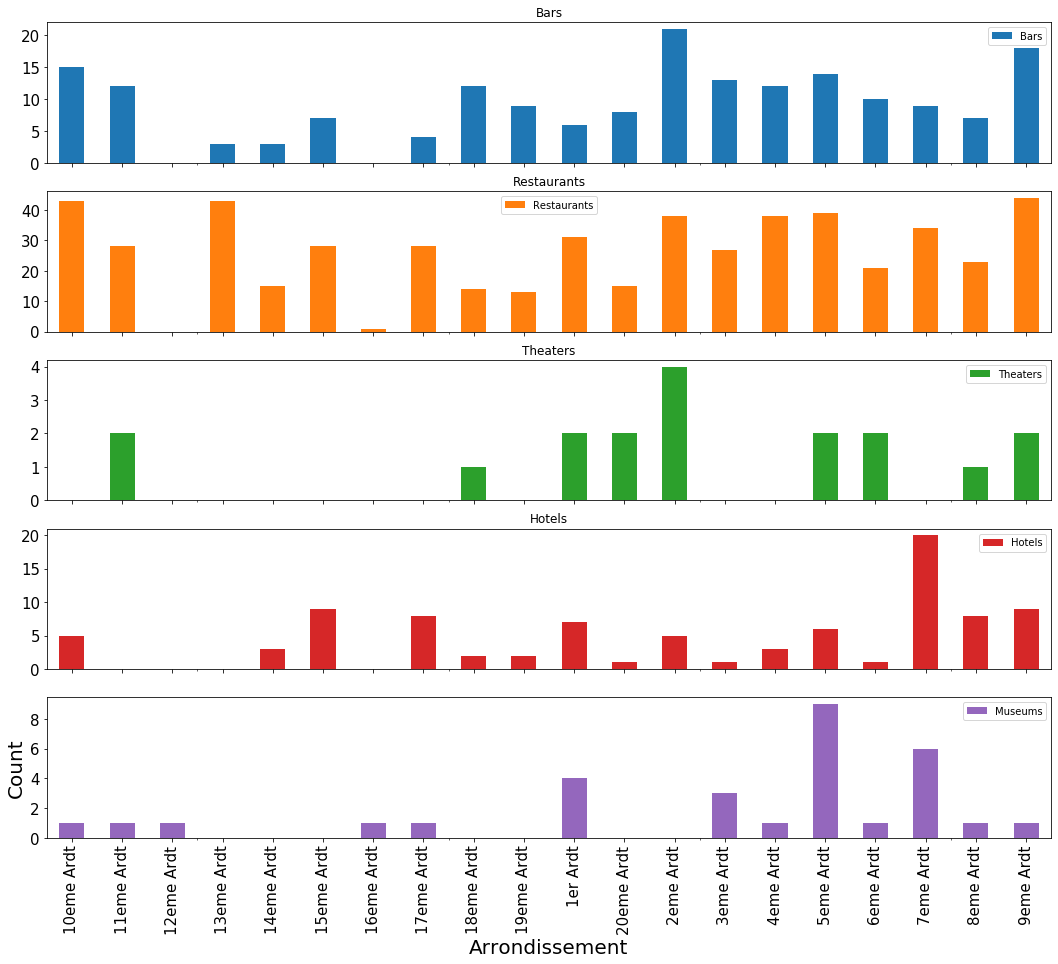

In [85]:
paris_venues_Nightlife_Hotels_Museums_counts_detail.plot(kind='bar', subplots=True, figsize=(18,15), fontsize = 15)
plt.title('')
plt.xlabel('Arrondissement', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.show()



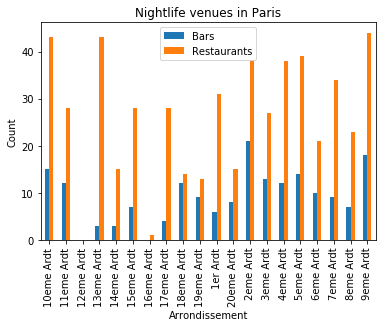

In [86]:
paris_venues_Nightlife_Hotels_Museums_counts_detail.plot(y = ['Bars', 'Restaurants'], kind='bar')
plt.title('Nightlife venues in Paris')
plt.xlabel('Arrondissement')
plt.ylabel('Count')
plt.show()

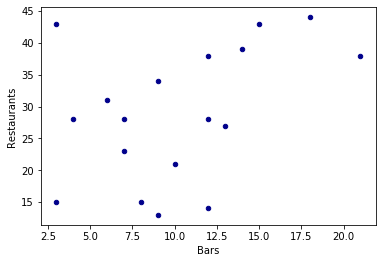

In [87]:
paris_venues_Nightlife_Hotels_Museums_counts_detail.plot.scatter(x='Bars',
                      y='Restaurants',
                      c='DarkBlue')
                                                                

### A matrix scatter plot of the five venues categories

F:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
F:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


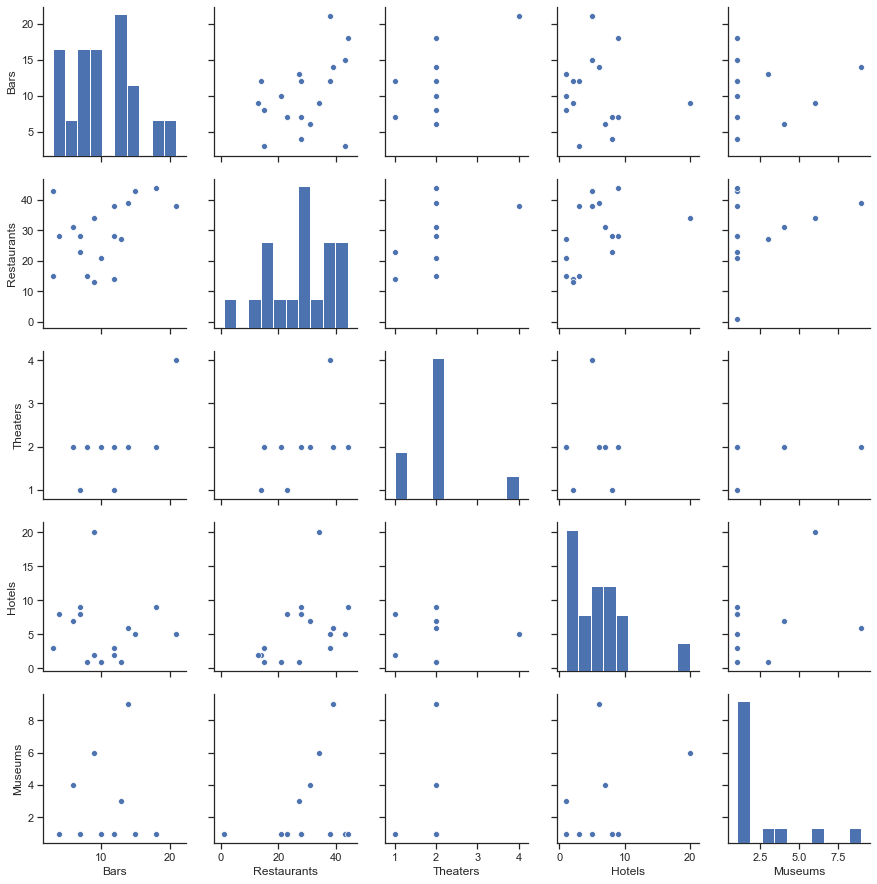

In [88]:
import seaborn as sns
sns.set(style="ticks")

paris_venues_Nightlife_Hotels_Museums_counts_detail_scatter = sns.pairplot(paris_venues_Nightlife_Hotels_Museums_counts_detail) #add the hue: hue=index

In [89]:
paris_venues_Nightlife_Hotels_Museums_counts_detail_scatter.savefig("paris_venues_Nightlife_Hotels_Museums_counts_detail_scatter.png")

## Importantly, the bars, restaurants, and data needs to be normalised to take into account the population and surface of the different *arrondissements*. I come back to this later.

# 5. Preparing the *socioeconomic and touristic* data


## Next I import, clean and process the various parts of the socioeconomic and other touristic data, combine it to the venues count data, do some visualisation, normalise it, before doing cluster analysis in paragraph 6.


## 5.1 The *Wealth* composite indicator

### First I import the *Wealth* data to create a composite of the normalised values representing the income level of the various *arrondissements*.

In [90]:
df_paris_wealth_data= pd.read_csv("F:\Dell Backup 03122018\Desktop Files Dell\IBM Data Science Certificate\Course 9 Applied Data Science Capstone\My Capstone project\Wealth_data2.csv", dtype={'leading_zero_column_name': object})
df_paris_wealth_data

,Part des ménages fiscaux imposés en 2016,Médiane du niveau vie en 2016,Taux de pauvreté en 2016
0,67,25618,18
1,70,26810,15
2,71,27110,14
3,66,23751,17
4,70,27288,13
5,74,30448,12
6,74,38387,11
7,72,30282,14
8,62,21542,22
9,59,19611,24


In [91]:
#df_paris_wealth_data.set_index('Arrondissement_Number')

### Before normalising the data, I open a short parenthesis for its visualisation through a bubble chart:

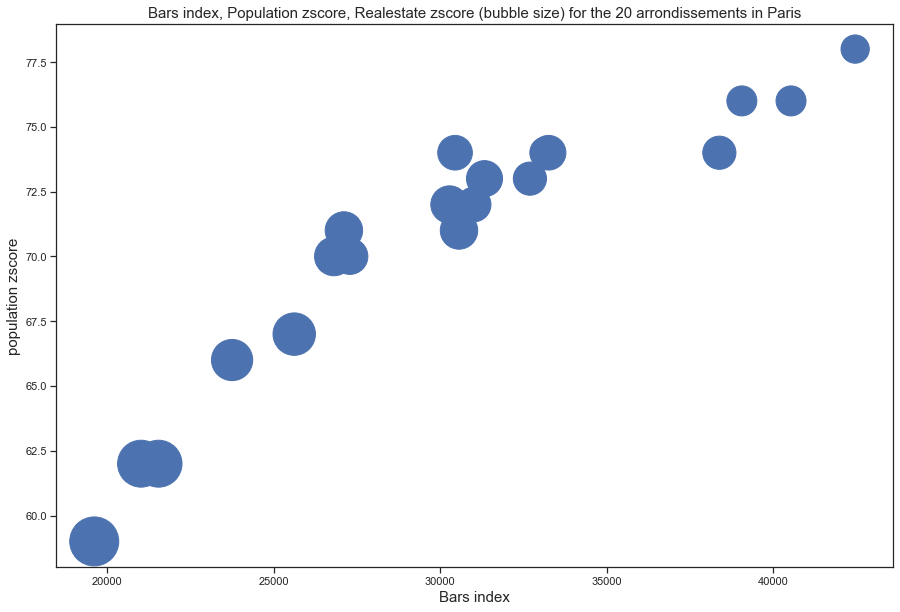

In [95]:
#import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15, 10))  
plt.scatter(x=df_paris_wealth_data['Médiane du niveau vie en 2016'],\
                y=df_paris_wealth_data['Part des ménages fiscaux imposés en 2016'],\
                    s = df_paris_wealth_data['Taux de pauvreté en 2016']*100,\
                        alpha=1) #c=cluster.labels_, 
plt.title('Bars index, Population zscore, Realestate zscore (bubble size) for the 20 arrondissements in Paris', fontsize = 15)
plt.xlabel('Bars index', fontsize = 15)
plt.ylabel('population zscore', fontsize = 15)
plt.show()


### Normalising the data using the min-max method

In [96]:
from sklearn import preprocessing

# Set charts to view inline
%matplotlib inline

In [97]:
type(df_paris_wealth_data)

pandas.core.frame.DataFrame

In [98]:
# I Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

In [99]:
# Then an object to transform the data to fit minmax processor
df_paris_wealth_data_wt_Index = min_max_scaler.fit_transform(df_paris_wealth_data)

In [109]:
# I normalise the dataframe
df_paris_wealth_data_wt_Index_normalized = pd.DataFrame(df_paris_wealth_data_wt_Index)
df_paris_wealth_data_wt_Index_normalized

,0,1,2
0,0.421053,0.262831,0.6250
1,0.578947,0.314986,0.4375
2,0.631579,0.328112,0.3750
3,0.368421,0.181142,0.5625
4,0.578947,0.335900,0.3125
5,0.789474,0.474163,0.2500
6,0.789474,0.821527,0.1875
7,0.684211,0.466900,0.3750
8,0.157895,0.084489,0.8750
9,0.000000,0.000000,1.0000


In [117]:
df_paris_wealth_data_wt_Index_normalized.columns = ['col1', 'col2', 'col3']

In [118]:
type(df_paris_wealth_data_wt_Index_normalized)

pandas.core.frame.DataFrame

In [119]:
df_paris_wealth_data_wt_Index_normalized

,col1,col2,col3
0,0.421053,0.262831,0.6250
1,0.578947,0.314986,0.4375
2,0.631579,0.328112,0.3750
3,0.368421,0.181142,0.5625
4,0.578947,0.335900,0.3125
5,0.789474,0.474163,0.2500
6,0.789474,0.821527,0.1875
7,0.684211,0.466900,0.3750
8,0.157895,0.084489,0.8750
9,0.000000,0.000000,1.0000


In [121]:
df_paris_wealth_data_wt_Index_normalized['col3'] = 1-df_paris_wealth_data_wt_Index_normalized['col3']

In [122]:
#list(df_paris_wealth_data_wt_Index_normalized.columns) 
for col in df_paris_wealth_data_wt_Index_normalized.columns: 
    print(col)

col1
col2
col3


In [123]:
df_paris_wealth_data_wt_Index_normalized

,col1,col2,col3
0,0.421053,0.262831,0.3750
1,0.578947,0.314986,0.5625
2,0.631579,0.328112,0.6250
3,0.368421,0.181142,0.4375
4,0.578947,0.335900,0.6875
5,0.789474,0.474163,0.7500
6,0.789474,0.821527,0.8125
7,0.684211,0.466900,0.6250
8,0.157895,0.084489,0.1250
9,0.000000,0.000000,0.0000


### I reverse te order of the third variable (the poverty rate)

### Then I create the composite, a simple weighted average if the three normalised fiscal, income and poverty indicators

In [131]:
df_paris_wealth_data_wt_Index_normalized = df_paris_wealth_data_wt_Index_normalized.sum(axis=1)
df_paris_wealth_data_wt_Index_normalized

0     1.058884
1     1.456433
2     1.584691
3     0.987063
4     1.602348
5     2.013637
6     2.423501
7     1.776111
8     0.367384
9     0.000000
10    2.121908
11    0.344413
12    1.735949
13    1.937228
14    1.932832
15    2.257692
16    2.683342
17    3.000000
18    2.747966
19    2.136586
dtype: float64

In [132]:
df_paris_wealth_data_wt_Index_normalized.to_frame()

,0
0,1.058884
1,1.456433
2,1.584691
3,0.987063
4,1.602348
5,2.013637
6,2.423501
7,1.776111
8,0.367384
9,0.000000


In [133]:
type(df_paris_wealth_data_wt_Index_normalized)

pandas.core.series.Series

### Finally, I transform the series to a dataframe and add the index 

In [134]:
frame = { 'wealth zscore': df_paris_wealth_data_wt_Index_normalized } 
  
df_paris_wealth_data_wt_Index_normalized = pd.DataFrame(frame) 

In [135]:
df_paris_wealth_data_wt_Index_normalized

,wealth zscore
0,1.058884
1,1.456433
2,1.584691
3,0.987063
4,1.602348
5,2.013637
6,2.423501
7,1.776111
8,0.367384
9,0.000000


In [136]:
paris_venues_Nightlife_Hotels_Museums_counts_detail.index

Index(['10eme Ardt', '11eme Ardt', '12eme Ardt', '13eme Ardt', '14eme Ardt',
       '15eme Ardt', '16eme Ardt', '17eme Ardt', '18eme Ardt', '19eme Ardt',
       '1er Ardt', '20eme Ardt', '2eme Ardt', '3eme Ardt', '4eme Ardt',
       '5eme Ardt', '6eme Ardt', '7eme Ardt', '8eme Ardt', '9eme Ardt'],
      dtype='object')

In [137]:
df_paris_wealth_data_wt_Index_normalized.set_index(paris_venues_Nightlife_Hotels_Museums_counts_detail.index)

,wealth zscore
10eme Ardt,1.058884
11eme Ardt,1.456433
12eme Ardt,1.584691
13eme Ardt,0.987063
14eme Ardt,1.602348
15eme Ardt,2.013637
16eme Ardt,2.423501
17eme Ardt,1.776111
18eme Ardt,0.367384
19eme Ardt,0.000000


## 5.2 The *Population* composite indicator

## Here I create a composite of population data, population density data, and the percentage variation of population data over 2013-2016

In [138]:
df_paris_population_data= pd.read_csv("F:\Dell Backup 03122018\Desktop Files Dell\IBM Data Science Certificate\Course 9 Applied Data Science Capstone\My Capstone project\population_data.csv", dtype={'leading_zero_column_name': object})
df_paris_population_data

,Population in 2016,Population density,Progression over 2013-2016
0,91932,30644,6.4
1,147017,36754,2.8
2,141494,8843,4.8
3,181552,25936,5.8
4,137105,22851,4.4
5,233484,29186,5.5
6,165446,10340,6.3
7,167835,27973,5.7
8,195060,32510,4.8
9,186393,26628,7.2


In [139]:
df_paris_population_data = min_max_scaler.fit_transform(df_paris_population_data)
df_paris_population_data_normalized = pd.DataFrame(df_paris_population_data)
df_paris_population_data_normalized = df_paris_population_data_normalized.sum(axis=1)
frame = { 'population zscore': df_paris_population_data_normalized } 
df_paris_population_data_normalized = pd.DataFrame(frame)
df_paris_population_data_normalized

,population zscore
0,1.977061
1,1.970381
2,1.233160
3,2.146214
4,1.649635
5,2.459328
6,1.593080
7,2.141065
8,2.306452
9,2.376881


In [140]:
df_paris_population_data_normalized.set_index(paris_venues_Nightlife_Hotels_Museums_counts_detail.index)

,population zscore
10eme Ardt,1.977061
11eme Ardt,1.970381
12eme Ardt,1.233160
13eme Ardt,2.146214
14eme Ardt,1.649635
15eme Ardt,2.459328
16eme Ardt,1.593080
17eme Ardt,2.141065
18eme Ardt,2.306452
19eme Ardt,2.376881


## 5.3 Constructing the *realestate* index

In [146]:
df_paris_realestate_data= pd.read_csv("F:\Dell Backup 03122018\Desktop Files Dell\IBM Data Science Certificate\Course 9 Applied Data Science Capstone\My Capstone project\problematic.csv", dtype={'leading_zero_column_name': object})
df_paris_realestate_data

,m2 price in euro,m2 percentage change 2018-2019 translated (1.8)
0,9816,0.0
1,11262,9.3
2,11560,15.3
3,13262,13.6
4,11609,8.9
5,13944,8.4
6,13569,7.2
7,12436,14.4
8,10497,6.2
9,9441,5.9


In [147]:
df_paris_realestate_data = min_max_scaler.fit_transform(df_paris_realestate_data)
df_paris_realestate_data_normalized = pd.DataFrame(df_paris_realestate_data)
df_paris_realestate_data_normalized = df_paris_realestate_data_normalized.sum(axis=1)
frame = { 'realestate zscore': df_paris_realestate_data_normalized } 
df_paris_realestate_data_normalized = pd.DataFrame(frame)
df_paris_realestate_data_normalized

,realestate zscore
0,0.322279
1,1.167521
2,1.608603
3,1.776920
4,1.198347
5,1.549020
6,1.409022
7,1.693598
8,0.839312
9,0.646333


In [148]:
df_paris_realestate_data_normalized.set_index(paris_venues_Nightlife_Hotels_Museums_counts_detail.index)

,realestate zscore
10eme Ardt,0.322279
11eme Ardt,1.167521
12eme Ardt,1.608603
13eme Ardt,1.776920
14eme Ardt,1.198347
15eme Ardt,1.549020
16eme Ardt,1.409022
17eme Ardt,1.693598
18eme Ardt,0.839312
19eme Ardt,0.646333


## 5.4 Importing the remaining socioeconomic and touristic data

In [150]:
df_paris_socioecon_remaining_data= pd.read_csv("F:\Dell Backup 03122018\Desktop Files Dell\IBM Data Science Certificate\Course 9 Applied Data Science Capstone\My Capstone project\socioecon_data_remaining.csv", dtype={'leading_zero_column_name': object})
df_paris_socioecon_remaining_data

,15-64 population density,Cumulative_tourism_data,Population_density,Touristic_sites_15,Touristic_sites_dummy
0,23328,NaN,30644.00000,NaN,Least touristic
1,29496,NaN,36754.25000,NaN,Least touristic
2,5988,NaN,8843.37500,NaN,Least touristic
3,17385,NaN,25936.00000,NaN,Least touristic
4,16703,NaN,22850.83333,NaN,Least touristic
5,18903,1.17,29185.50000,Tour Montparnasse,Moderately touristic
6,6369,1.40,10340.37500,Fondation Louis Vuitton,Moderately touristic
7,20720,NaN,27972.50000,NaN,Least touristic
8,23558,11.00,32510.00000,Basilique sacre-coeur de Montmartre,Very touristic
9,18724,NaN,26627.57143,NaN,Least touristic


In [151]:
type(df_paris_socioecon_remaining_data)

pandas.core.frame.DataFrame

In [152]:
df_paris_socioecon_remaining_data.set_index(paris_venues_Nightlife_Hotels_Museums_counts_detail.index)

,15-64 population density,Cumulative_tourism_data,Population_density,Touristic_sites_15,Touristic_sites_dummy
10eme Ardt,23328,NaN,30644.00000,NaN,Least touristic
11eme Ardt,29496,NaN,36754.25000,NaN,Least touristic
12eme Ardt,5988,NaN,8843.37500,NaN,Least touristic
13eme Ardt,17385,NaN,25936.00000,NaN,Least touristic
14eme Ardt,16703,NaN,22850.83333,NaN,Least touristic
15eme Ardt,18903,1.17,29185.50000,Tour Montparnasse,Moderately touristic
16eme Ardt,6369,1.40,10340.37500,Fondation Louis Vuitton,Moderately touristic
17eme Ardt,20720,NaN,27972.50000,NaN,Least touristic
18eme Ardt,23558,11.00,32510.00000,Basilique sacre-coeur de Montmartre,Very touristic
19eme Ardt,18724,NaN,26627.57143,NaN,Least touristic


In [153]:
type(df_paris_socioecon_remaining_data)

pandas.core.frame.DataFrame

In [154]:
population_density_data = df_paris_socioecon_remaining_data['Population_density']
population_density_data

0     30644.00000
1     36754.25000
2      8843.37500
3     25936.00000
4     22850.83333
5     29185.50000
6     10340.37500
7     27972.50000
8     32510.00000
9     26627.57143
10     8126.00000
11    32600.66667
12    20260.00000
13    34788.00000
14    13743.50000
15    19702.66667
16    20458.00000
17    13128.00000
18     9113.25000
19    29814.50000
Name: Population_density, dtype: float64

In [155]:
frame = { 'population density': population_density_data } 
  
population_density_data = pd.DataFrame(frame) 

In [156]:
population_density_data.set_index(paris_venues_Nightlife_Hotels_Museums_counts_detail.index)

,population density
10eme Ardt,30644.00000
11eme Ardt,36754.25000
12eme Ardt,8843.37500
13eme Ardt,25936.00000
14eme Ardt,22850.83333
15eme Ardt,29185.50000
16eme Ardt,10340.37500
17eme Ardt,27972.50000
18eme Ardt,32510.00000
19eme Ardt,26627.57143


# 6. Preparing the final dataset

## In this paragraph I combine the various dataframes contruscted in the preious paragraphs, that will form the basis of cluster analysis in paragraph 7. 

## Recall the detailed venues data constructed from Foursquare

In [157]:
paris_venues_Nightlife_Hotels_Museums_counts_detail

,Bars,Restaurants,Theaters,Hotels,Museums
10eme Ardt,15.0,43.0,NaN,5.0,1.0
11eme Ardt,12.0,28.0,2.0,NaN,1.0
12eme Ardt,NaN,NaN,NaN,NaN,1.0
13eme Ardt,3.0,43.0,NaN,NaN,NaN
14eme Ardt,3.0,15.0,NaN,3.0,NaN
15eme Ardt,7.0,28.0,NaN,9.0,NaN
16eme Ardt,NaN,1.0,NaN,NaN,1.0
17eme Ardt,4.0,28.0,NaN,8.0,1.0
18eme Ardt,12.0,14.0,1.0,2.0,NaN
19eme Ardt,9.0,13.0,NaN,2.0,NaN


In [158]:
paris_venues_Nightlife_Hotels_Museums_counts_detail_clean = paris_venues_Nightlife_Hotels_Museums_counts_detail.fillna(0)

In [159]:
paris_venues_Nightlife_Hotels_Museums_counts_detail_clean

,Bars,Restaurants,Theaters,Hotels,Museums
10eme Ardt,15.0,43.0,0.0,5.0,1.0
11eme Ardt,12.0,28.0,2.0,0.0,1.0
12eme Ardt,0.0,0.0,0.0,0.0,1.0
13eme Ardt,3.0,43.0,0.0,0.0,0.0
14eme Ardt,3.0,15.0,0.0,3.0,0.0
15eme Ardt,7.0,28.0,0.0,9.0,0.0
16eme Ardt,0.0,1.0,0.0,0.0,1.0
17eme Ardt,4.0,28.0,0.0,8.0,1.0
18eme Ardt,12.0,14.0,1.0,2.0,0.0
19eme Ardt,9.0,13.0,0.0,2.0,0.0


## 6.1 Constructing the *Bars*, *Restaurants*, and *Theaters* indexes

## Three of these indicators, the *Bars*, *Restaurants*, and *Theaters* categories -- that form the core of the competition data for our business -- need to be scaled to take into account the differences in surface and population of the *arrondissements* . This will be done through dividing their values by the population density data (which I have extracted for this purpose in the previous paragraph). 

### I start by resetting the index of *paris_venues_Nightlife_Hotels_Museums_counts_detail_clean* due to concatenating problems

In [160]:
paris_venues_Nightlife_Hotels_Museums_counts_detail_clean2 = paris_venues_Nightlife_Hotels_Museums_counts_detail_clean
paris_venues_Nightlife_Hotels_Museums_counts_detail_clean2.reset_index(drop=True, inplace=True)
paris_venues_Nightlife_Hotels_Museums_counts_detail_clean2

,Bars,Restaurants,Theaters,Hotels,Museums
0,15.0,43.0,0.0,5.0,1.0
1,12.0,28.0,2.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,3.0,43.0,0.0,0.0,0.0
4,3.0,15.0,0.0,3.0,0.0
5,7.0,28.0,0.0,9.0,0.0
6,0.0,1.0,0.0,0.0,1.0
7,4.0,28.0,0.0,8.0,1.0
8,12.0,14.0,1.0,2.0,0.0
9,9.0,13.0,0.0,2.0,0.0


In [161]:
paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density = pd.concat([population_density_data, paris_venues_Nightlife_Hotels_Museums_counts_detail_clean2], axis = 1, sort=True)
paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density

,population density,Bars,Restaurants,Theaters,Hotels,Museums
0,30644.00000,15.0,43.0,0.0,5.0,1.0
1,36754.25000,12.0,28.0,2.0,0.0,1.0
2,8843.37500,0.0,0.0,0.0,0.0,1.0
3,25936.00000,3.0,43.0,0.0,0.0,0.0
4,22850.83333,3.0,15.0,0.0,3.0,0.0
5,29185.50000,7.0,28.0,0.0,9.0,0.0
6,10340.37500,0.0,1.0,0.0,0.0,1.0
7,27972.50000,4.0,28.0,0.0,8.0,1.0
8,32510.00000,12.0,14.0,1.0,2.0,0.0
9,26627.57143,9.0,13.0,0.0,2.0,0.0


### calculating *Bars*, *Restaurants* and *Theaters* rescaled

In [162]:
paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density['Bars index'] =\
    paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density['Bars']/paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density['population density']*1000
paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density['Restaurants index'] =\
    paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density['Restaurants']/paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density['population density']*1000
paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density['Theaters index'] =\
    paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density['Theaters']/paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density['population density']*1000


In [163]:
paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density

,population density,Bars,Restaurants,Theaters,Hotels,Museums,Bars index,Restaurants index,Theaters index
0,30644.00000,15.0,43.0,0.0,5.0,1.0,0.489492,1.403211,0.000000
1,36754.25000,12.0,28.0,2.0,0.0,1.0,0.326493,0.761817,0.054415
2,8843.37500,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000
3,25936.00000,3.0,43.0,0.0,0.0,0.0,0.115669,1.657927,0.000000
4,22850.83333,3.0,15.0,0.0,3.0,0.0,0.131286,0.656431,0.000000
5,29185.50000,7.0,28.0,0.0,9.0,0.0,0.239845,0.959381,0.000000
6,10340.37500,0.0,1.0,0.0,0.0,1.0,0.000000,0.096708,0.000000
7,27972.50000,4.0,28.0,0.0,8.0,1.0,0.142998,1.000983,0.000000
8,32510.00000,12.0,14.0,1.0,2.0,0.0,0.369117,0.430637,0.030760
9,26627.57143,9.0,13.0,0.0,2.0,0.0,0.337996,0.488216,0.000000


In [164]:
paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density_final=paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density

In [165]:
paris_venues_Nightlife_Hotels_Museums_counts_detail_final =paris_venues_Nightlife_Hotels_Museums_counts_detail2_and_density_final.drop(columns =['population density','Bars','Restaurants','Theaters'])

In [166]:
paris_venues_Nightlife_Hotels_Museums_counts_detail_final

,Hotels,Museums,Bars index,Restaurants index,Theaters index
0,5.0,1.0,0.489492,1.403211,0.000000
1,0.0,1.0,0.326493,0.761817,0.054415
2,0.0,1.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.115669,1.657927,0.000000
4,3.0,0.0,0.131286,0.656431,0.000000
5,9.0,0.0,0.239845,0.959381,0.000000
6,0.0,1.0,0.000000,0.096708,0.000000
7,8.0,1.0,0.142998,1.000983,0.000000
8,2.0,0.0,0.369117,0.430637,0.030760
9,2.0,0.0,0.337996,0.488216,0.000000


In [167]:
paris_venues_Nightlife_Hotels_Museums_counts_detail.index

Index(['10eme Ardt', '11eme Ardt', '12eme Ardt', '13eme Ardt', '14eme Ardt',
       '15eme Ardt', '16eme Ardt', '17eme Ardt', '18eme Ardt', '19eme Ardt',
       '1er Ardt', '20eme Ardt', '2eme Ardt', '3eme Ardt', '4eme Ardt',
       '5eme Ardt', '6eme Ardt', '7eme Ardt', '8eme Ardt', '9eme Ardt'],
      dtype='object')

### Before doing some visualisation, I add an indicator of the tourristic visiting numbers of the top touristic sites

In [168]:
touristic_sites_visiting = df_paris_socioecon_remaining_data['Touristic_sites_dummy']

In [169]:
touristic_sites_visiting

0          Least touristic
1          Least touristic
2          Least touristic
3          Least touristic
4          Least touristic
5     Moderately touristic
6     Moderately touristic
7          Least touristic
8           Very touristic
9          Least touristic
10          Very touristic
11         Least touristic
12         Least touristic
13         Least touristic
14          Very touristic
15    Moderately touristic
16         Least touristic
17          Very touristic
18          Very touristic
19          Very touristic
Name: Touristic_sites_dummy, dtype: object

In [170]:
paris_venues_Nightlife_Hotels_Museums_counts_detail_final_temporary=paris_venues_Nightlife_Hotels_Museums_counts_detail_final
paris_venues_Nightlife_Hotels_Museums_counts_detail_final_temporary.reset_index(drop=True, inplace=True)
paris_venues_Nightlife_Hotels_Museums_counts_detail_final_temporary

,Hotels,Museums,Bars index,Restaurants index,Theaters index
0,5.0,1.0,0.489492,1.403211,0.000000
1,0.0,1.0,0.326493,0.761817,0.054415
2,0.0,1.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.115669,1.657927,0.000000
4,3.0,0.0,0.131286,0.656431,0.000000
5,9.0,0.0,0.239845,0.959381,0.000000
6,0.0,1.0,0.000000,0.096708,0.000000
7,8.0,1.0,0.142998,1.000983,0.000000
8,2.0,0.0,0.369117,0.430637,0.030760
9,2.0,0.0,0.337996,0.488216,0.000000


In [171]:
paris_venues_Nightlife_Hotels_Museums_counts_detail_temporary2 = pd.concat([touristic_sites_visiting, paris_venues_Nightlife_Hotels_Museums_counts_detail_final_temporary], axis = 1, sort=True)
paris_venues_Nightlife_Hotels_Museums_counts_detail_temporary2

,Touristic_sites_dummy,Hotels,Museums,Bars index,Restaurants index,Theaters index
0,Least touristic,5.0,1.0,0.489492,1.403211,0.000000
1,Least touristic,0.0,1.0,0.326493,0.761817,0.054415
2,Least touristic,0.0,1.0,0.000000,0.000000,0.000000
3,Least touristic,0.0,0.0,0.115669,1.657927,0.000000
4,Least touristic,3.0,0.0,0.131286,0.656431,0.000000
5,Moderately touristic,9.0,0.0,0.239845,0.959381,0.000000
6,Moderately touristic,0.0,1.0,0.000000,0.096708,0.000000
7,Least touristic,8.0,1.0,0.142998,1.000983,0.000000
8,Very touristic,2.0,0.0,0.369117,0.430637,0.030760
9,Least touristic,2.0,0.0,0.337996,0.488216,0.000000


## Now the matrix scatter plot for the venues dataframe is more meaningful 

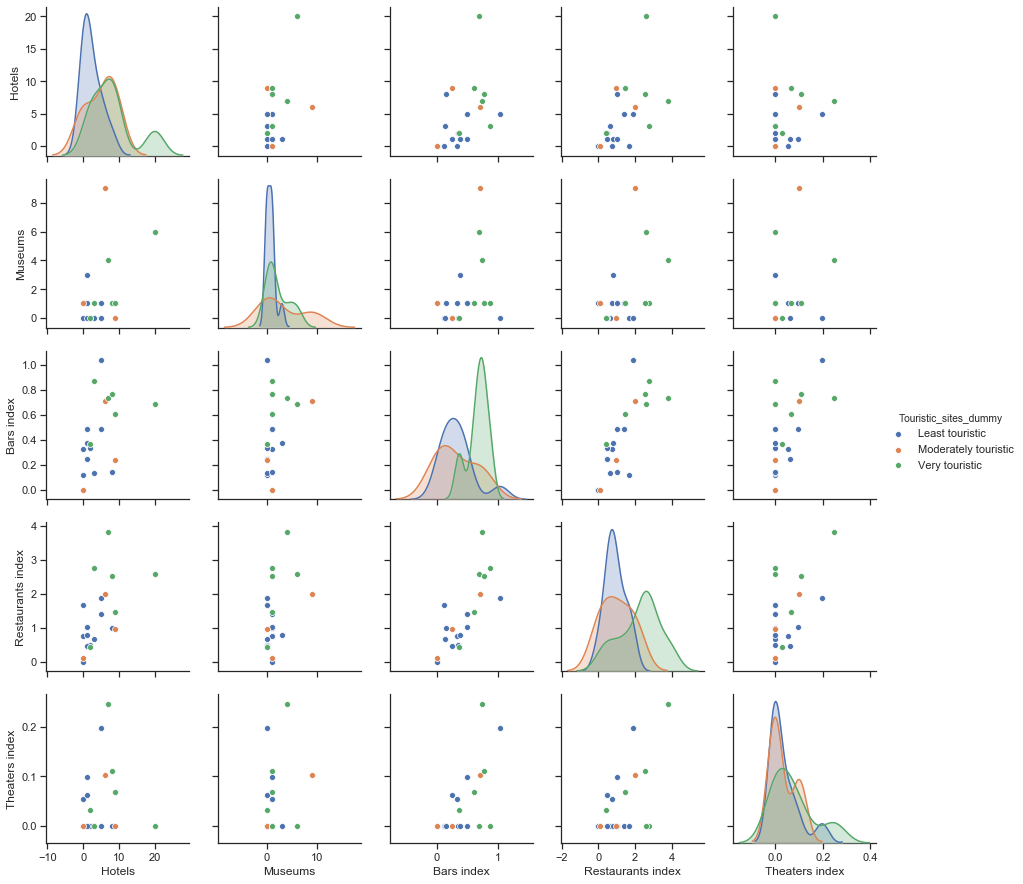

In [172]:
import seaborn as sns
sns.set(style="ticks")

paris_venues_Nightlife_Hotels_Museums_counts_detail_scatter2 =\
sns.pairplot(paris_venues_Nightlife_Hotels_Museums_counts_detail_temporary2,\
             x_vars=["Hotels", "Museums","Bars index","Restaurants index","Theaters index"],\
                 y_vars=["Hotels", "Museums","Bars index","Restaurants index","Theaters index"], diag_kind="kde", hue = "Touristic_sites_dummy" ) #add the hue: hue=index

In [173]:
paris_venues_Nightlife_Hotels_Museums_counts_detail_scatter2.savefig("paris_venues_Nightlife_Hotels_Museums_counts_detail_scatter2.png")

## 6.2 Concatenating the zscores composites

In [174]:
df_paris_wealth_realestate_population_data = pd.concat([df_paris_wealth_data_wt_Index_normalized, df_paris_realestate_data_normalized, df_paris_population_data_normalized], axis=1, sort=True)
df_paris_wealth_realestate_population_data

,wealth zscore,realestate zscore,population zscore
0,1.058884,0.322279,1.977061
1,1.456433,1.167521,1.970381
2,1.584691,1.608603,1.233160
3,0.987063,1.776920,2.146214
4,1.602348,1.198347,1.649635
5,2.013637,1.549020,2.459328
6,2.423501,1.409022,1.593080
7,1.776111,1.693598,2.141065
8,0.367384,0.839312,2.306452
9,0.000000,0.646333,2.376881


## 6.3 Extracting the last  quantitative variables

In [176]:
df_paris_socioecon_remaining_data

,15-64 population density,Cumulative_tourism_data,Population_density,Touristic_sites_15,Touristic_sites_dummy
0,23328,NaN,30644.00000,NaN,Least touristic
1,29496,NaN,36754.25000,NaN,Least touristic
2,5988,NaN,8843.37500,NaN,Least touristic
3,17385,NaN,25936.00000,NaN,Least touristic
4,16703,NaN,22850.83333,NaN,Least touristic
5,18903,1.17,29185.50000,Tour Montparnasse,Moderately touristic
6,6369,1.40,10340.37500,Fondation Louis Vuitton,Moderately touristic
7,20720,NaN,27972.50000,NaN,Least touristic
8,23558,11.00,32510.00000,Basilique sacre-coeur de Montmartre,Very touristic
9,18724,NaN,26627.57143,NaN,Least touristic


In [177]:
socioecon_last_variables = df_paris_socioecon_remaining_data[['15-64 population density','Cumulative_tourism_data']]
socioecon_last_variables

,15-64 population density,Cumulative_tourism_data
0,23328,NaN
1,29496,NaN
2,5988,NaN
3,17385,NaN
4,16703,NaN
5,18903,1.17
6,6369,1.40
7,20720,NaN
8,23558,11.00
9,18724,NaN


In [178]:
socioecon_last_variables_final = socioecon_last_variables.fillna(0)
socioecon_last_variables_final

,15-64 population density,Cumulative_tourism_data
0,23328,0.00
1,29496,0.00
2,5988,0.00
3,17385,0.00
4,16703,0.00
5,18903,1.17
6,6369,1.40
7,20720,0.00
8,23558,11.00
9,18724,0.00


## 6.4 Lastly, the finalised dataframe

In [179]:
paris_venues_Nightlife_Hotels_Museums_counts_detail_final

,Hotels,Museums,Bars index,Restaurants index,Theaters index
0,5.0,1.0,0.489492,1.403211,0.000000
1,0.0,1.0,0.326493,0.761817,0.054415
2,0.0,1.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.115669,1.657927,0.000000
4,3.0,0.0,0.131286,0.656431,0.000000
5,9.0,0.0,0.239845,0.959381,0.000000
6,0.0,1.0,0.000000,0.096708,0.000000
7,8.0,1.0,0.142998,1.000983,0.000000
8,2.0,0.0,0.369117,0.430637,0.030760
9,2.0,0.0,0.337996,0.488216,0.000000


In [300]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data = pd.concat([paris_venues_Nightlife_Hotels_Museums_counts_detail_final, df_paris_wealth_realestate_population_data, socioecon_last_variables_final], axis=1, sort=True)
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data


,Hotels,Museums,Bars index,Restaurants index,Theaters index,wealth zscore,realestate zscore,population zscore,15-64 population density,Cumulative_tourism_data
0,5.0,1.0,0.489492,1.403211,0.000000,1.058884,0.322279,1.977061,23328,0.00
1,0.0,1.0,0.326493,0.761817,0.054415,1.456433,1.167521,1.970381,29496,0.00
2,0.0,1.0,0.000000,0.000000,0.000000,1.584691,1.608603,1.233160,5988,0.00
3,0.0,0.0,0.115669,1.657927,0.000000,0.987063,1.776920,2.146214,17385,0.00
4,3.0,0.0,0.131286,0.656431,0.000000,1.602348,1.198347,1.649635,16703,0.00
5,9.0,0.0,0.239845,0.959381,0.000000,2.013637,1.549020,2.459328,18903,1.17
6,0.0,1.0,0.000000,0.096708,0.000000,2.423501,1.409022,1.593080,6369,1.40
7,8.0,1.0,0.142998,1.000983,0.000000,1.776111,1.693598,2.141065,20720,0.00
8,2.0,0.0,0.369117,0.430637,0.030760,0.367384,0.839312,2.306452,23558,11.00
9,2.0,0.0,0.337996,0.488216,0.000000,0.000000,0.646333,2.376881,18724,0.00


In [301]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data.shape

(20, 10)

In [302]:
type(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data)

pandas.core.frame.DataFrame

In [303]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data.to_csv('df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data.csv')

In [ ]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data.index\
    (paris_venues_Nightlife_Hotels_Museums_counts_detail.index)

# 7. Overall Zscore and Clustering

## I will make use of two clustering methods -- k-means clustering and hierachical clustering -- to have some insights regarding the best *arrondissemnents* for our entrepreneur.

### 7.1 To start with, this dataset requires normalisation

In [305]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data = min_max_scaler.fit_transform(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data)
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised = pd.DataFrame(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data)
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised

,0,1,2,3,4,5,6,7,8,9
0,0.25,0.111111,0.472243,0.367822,0.000000,0.352961,0.000000,0.731998,0.737621,0.000000
1,0.00,0.111111,0.314988,0.199694,0.221090,0.485478,0.581066,0.729354,1.000000,0.000000
2,0.00,0.111111,0.000000,0.000000,0.000000,0.528230,0.884289,0.437590,0.000000,0.000000
3,0.00,0.000000,0.111593,0.434591,0.000000,0.329021,1.000000,0.798942,0.484814,0.000000
4,0.15,0.000000,0.126660,0.172070,0.000000,0.534116,0.602257,0.602415,0.455802,0.000000
5,0.45,0.000000,0.231393,0.251481,0.000000,0.671212,0.843329,0.922861,0.549387,0.067049
6,0.00,0.111111,0.000000,0.025350,0.000000,0.807834,0.747087,0.580033,0.016207,0.080229
7,0.40,0.111111,0.137959,0.262387,0.000000,0.592037,0.942720,0.796905,0.626680,0.000000
8,0.10,0.000000,0.356110,0.112882,0.124977,0.122461,0.355437,0.862359,0.747405,0.630372
9,0.10,0.000000,0.326085,0.127976,0.000000,0.000000,0.222773,0.890232,0.541773,0.000000


## 7.2 An Overall *Arrondissement* Zscore 

### For the sake of comparing it to the final clusters, I calculate, based on the 10 indicators, an overall zscore that represents the attractivity of each *arrondissement*. However, some of those vairables need to be reversed. A high *Bars index* or *realestate zscore*  for example should impact the composite index negatively, while a high *Population index* would increase the attractiveness of the *arrondissement*.

In [306]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised.columns=\
    ['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10']

In [307]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,0.25,0.111111,0.472243,0.367822,0.000000,0.352961,0.000000,0.731998,0.737621,0.000000
1,0.00,0.111111,0.314988,0.199694,0.221090,0.485478,0.581066,0.729354,1.000000,0.000000
2,0.00,0.111111,0.000000,0.000000,0.000000,0.528230,0.884289,0.437590,0.000000,0.000000
3,0.00,0.000000,0.111593,0.434591,0.000000,0.329021,1.000000,0.798942,0.484814,0.000000
4,0.15,0.000000,0.126660,0.172070,0.000000,0.534116,0.602257,0.602415,0.455802,0.000000
5,0.45,0.000000,0.231393,0.251481,0.000000,0.671212,0.843329,0.922861,0.549387,0.067049
6,0.00,0.111111,0.000000,0.025350,0.000000,0.807834,0.747087,0.580033,0.016207,0.080229
7,0.40,0.111111,0.137959,0.262387,0.000000,0.592037,0.942720,0.796905,0.626680,0.000000
8,0.10,0.000000,0.356110,0.112882,0.124977,0.122461,0.355437,0.862359,0.747405,0.630372
9,0.10,0.000000,0.326085,0.127976,0.000000,0.000000,0.222773,0.890232,0.541773,0.000000


In [196]:
type(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised)

pandas.core.frame.DataFrame

### I reverse the order of some the variables to make their directions comparable: higher values should indicate higher attractiveness 

In [308]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised['col3']=\
    1-df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised['col3']

In [309]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised['col4']=\
    1-df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised['col4']

In [310]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised['col5']=\
    1-df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised['col5']

In [311]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised['col7']=\
    1-df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised['col7']

In [312]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,0.25,0.111111,0.527757,6.321776e-01,1.000000,0.352961,1.000000e+00,0.731998,0.737621,0.000000
1,0.00,0.111111,0.685012,8.003057e-01,0.778910,0.485478,4.189342e-01,0.729354,1.000000,0.000000
2,0.00,0.111111,1.000000,1.000000e+00,1.000000,0.528230,1.157107e-01,0.437590,0.000000,0.000000
3,0.00,0.000000,0.888407,5.654091e-01,1.000000,0.329021,1.110223e-16,0.798942,0.484814,0.000000
4,0.15,0.000000,0.873340,8.279303e-01,1.000000,0.534116,3.977430e-01,0.602415,0.455802,0.000000
5,0.45,0.000000,0.768607,7.485185e-01,1.000000,0.671212,1.566714e-01,0.922861,0.549387,0.067049
6,0.00,0.111111,1.000000,9.746499e-01,1.000000,0.807834,2.529134e-01,0.580033,0.016207,0.080229
7,0.40,0.111111,0.862041,7.376133e-01,1.000000,0.592037,5.728032e-02,0.796905,0.626680,0.000000
8,0.10,0.000000,0.643890,8.871176e-01,0.875023,0.122461,6.445633e-01,0.862359,0.747405,0.630372
9,0.10,0.000000,0.673915,8.720245e-01,1.000000,0.000000,7.772271e-01,0.890232,0.541773,0.000000


In [314]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised = min_max_scaler.fit_transform(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised)
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised = pd.DataFrame(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised)
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_zscore = df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised.sum(axis=1)
frame = { 'Overall Arrondissement Score': df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_zscore } 
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_zscore = pd.DataFrame(frame)
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_zscore

,Overall Arrondissement Score
0,5.343626
1,5.009105
2,4.192642
3,4.066593
4,4.841347
5,5.334306
6,4.822977
7,5.183668
8,5.513191
9,4.855171


Which I normalise

In [315]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_zscore = min_max_scaler.fit_transform(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_zscore)
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_zscore = pd.DataFrame(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_zscore)
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_zscore

,0
0,0.727461
1,0.622264
2,0.365509
3,0.325870
4,0.569509
5,0.724530
6,0.563732
7,0.677159
8,0.780785
9,0.573856


In [204]:
type(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_zscore)

pandas.core.frame.DataFrame

In [316]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised['Overall zscore']=\
    df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_zscore

In [317]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised

,0,1,2,3,4,5,6,7,8,9,Overall zscore
0,0.25,0.111111,0.527757,0.632178,1.000000,0.352961,1.000000,0.731998,0.737621,0.000000,0.727461
1,0.00,0.111111,0.685012,0.800306,0.778910,0.485478,0.418934,0.729354,1.000000,0.000000,0.622264
2,0.00,0.111111,1.000000,1.000000,1.000000,0.528230,0.115711,0.437590,0.000000,0.000000,0.365509
3,0.00,0.000000,0.888407,0.565409,1.000000,0.329021,0.000000,0.798942,0.484814,0.000000,0.325870
4,0.15,0.000000,0.873340,0.827930,1.000000,0.534116,0.397743,0.602415,0.455802,0.000000,0.569509
5,0.45,0.000000,0.768607,0.748519,1.000000,0.671212,0.156671,0.922861,0.549387,0.067049,0.724530
6,0.00,0.111111,1.000000,0.974650,1.000000,0.807834,0.252913,0.580033,0.016207,0.080229,0.563732
7,0.40,0.111111,0.862041,0.737613,1.000000,0.592037,0.057280,0.796905,0.626680,0.000000,0.677159
8,0.10,0.000000,0.643890,0.887118,0.875023,0.122461,0.644563,0.862359,0.747405,0.630372,0.780785
9,0.10,0.000000,0.673915,0.872024,1.000000,0.000000,0.777227,0.890232,0.541773,0.000000,0.573856


## 7.3 k-means clustering

In [318]:

# I set number of clusters
kclusters = 4

# I run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised)

# Then check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 3, 0, 3, 1])

In [319]:
cluster_number_kmeans5 = kmeans.labels_

In [320]:
frame = { 'Cluster number - kmeans': cluster_number } 
cluster_number_kmeans5 = pd.DataFrame(frame)


In [321]:
cluster_number_kmeans5

,Cluster number - kmeans
0,1
1,1
2,3
3,3
4,3
5,3
6,3
7,3
8,1
9,1


In [322]:
type(cluster_number_kmeans5)

pandas.core.frame.DataFrame

## 7.4 creating the overall dataframe that will compare the two cluster methods classes and the overall zscore

In [323]:
Final_classification_dataframe = cluster_number_kmeans5

In [324]:
Final_classification_dataframe['Overall Arrondissement Score']=df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_zscore

In [325]:
Final_classification_dataframe

,Cluster number - kmeans,Overall Arrondissement Score
0,1,0.727461
1,1,0.622264
2,3,0.365509
3,3,0.325870
4,3,0.569509
5,3,0.724530
6,3,0.563732
7,3,0.677159
8,1,0.780785
9,1,0.573856


## 7.5 Hierarchical clustering

In [326]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [327]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised.columns = ['Hotels', 'Museums', 'Bars index', 'Restaurants index',\
       'Theaters index', 'wealth zscore', 'realestate zscore',\
       'population zscore', '15-64 population density',\
       'Cumulative_tourism_data','Overall score']

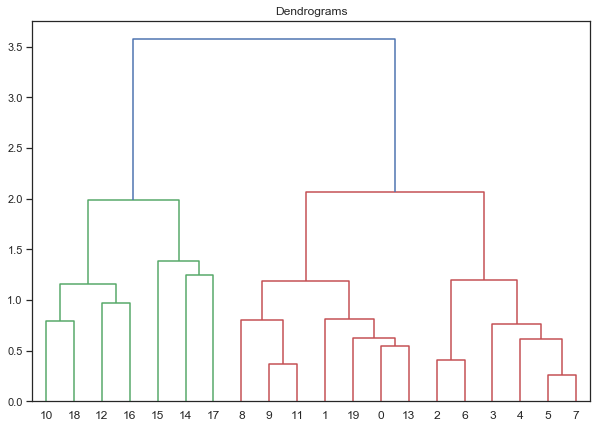

In [328]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised, method='ward'))

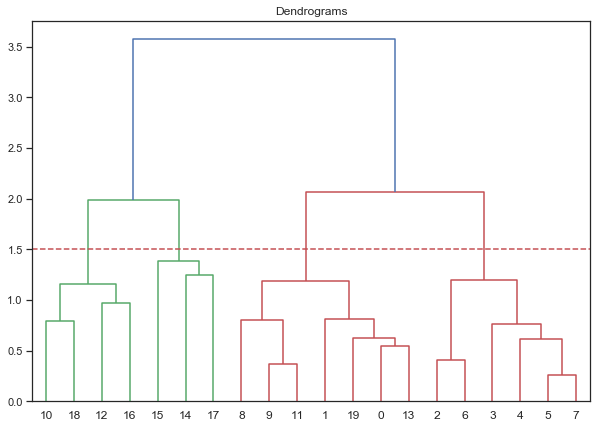

In [329]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')

In [330]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster_number_hierarchical=cluster.fit_predict(df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised)
cluster_number_hierarchical

array([2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 3, 0, 3, 2],
      dtype=int64)

In [331]:
cluster

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

### Adding these clusters numbers to the final classification dataframe

In [332]:
Final_classification_dataframe['Cluster number - hieracrchical']=cluster_number_hierarchical

In [333]:
Final_classification_dataframe

,Cluster number - kmeans,Overall Arrondissement Score,Cluster number - hieracrchical
0,1,0.727461,2
1,1,0.622264,2
2,3,0.365509,1
3,3,0.325870,1
4,3,0.569509,1
5,3,0.724530,1
6,3,0.563732,1
7,3,0.677159,1
8,1,0.780785,2
9,1,0.573856,2


### the below couple of cells are preparing the bar chart

In [334]:
Final_classification_dataframe_with_index = Final_classification_dataframe
Final_classification_dataframe_with_index = Final_classification_dataframe.set_index(paris_venues_Nightlife_Hotels_Museums_counts_detail.index)
Final_classification_dataframe_with_index

,Cluster number - kmeans,Overall Arrondissement Score,Cluster number - hieracrchical
10eme Ardt,1,0.727461,2
11eme Ardt,1,0.622264,2
12eme Ardt,3,0.365509,1
13eme Ardt,3,0.325870,1
14eme Ardt,3,0.569509,1
15eme Ardt,3,0.724530,1
16eme Ardt,3,0.563732,1
17eme Ardt,3,0.677159,1
18eme Ardt,1,0.780785,2
19eme Ardt,1,0.573856,2


In [335]:
Final_classification_dataframe_with_index['Overall Arrondissement Score']=Final_classification_dataframe_with_index['Overall Arrondissement Score']*10
Final_classification_dataframe_with_index

,Cluster number - kmeans,Overall Arrondissement Score,Cluster number - hieracrchical
10eme Ardt,1,7.274614,2
11eme Ardt,1,6.222639,2
12eme Ardt,3,3.655089,1
13eme Ardt,3,3.258697,1
14eme Ardt,3,5.695085,1
15eme Ardt,3,7.245305,1
16eme Ardt,3,5.637318,1
17eme Ardt,3,6.771590,1
18eme Ardt,1,7.807850,2
19eme Ardt,1,5.738559,2


In [336]:
Final_classification_dataframe_with_index=Final_classification_dataframe_with_index.sort_values(by=['Overall Arrondissement Score'])
Final_classification_dataframe_with_index

,Cluster number - kmeans,Overall Arrondissement Score,Cluster number - hieracrchical
2eme Ardt,0,0.000000,3
1er Ardt,0,0.329945,3
8eme Ardt,0,2.128829,3
6eme Ardt,0,2.810138,3
13eme Ardt,3,3.258697,1
12eme Ardt,3,3.655089,1
4eme Ardt,2,5.379724,0
16eme Ardt,3,5.637318,1
14eme Ardt,3,5.695085,1
19eme Ardt,1,5.738559,2


### reordering the dataframe 

In [337]:
Final_classification_dataframe_with_index_reordered = Final_classification_dataframe_with_index[["Cluster number - kmeans",\
                                                                                           "Cluster number - hieracrchical",\
                                                                                           "Overall Arrondissement Score"]]

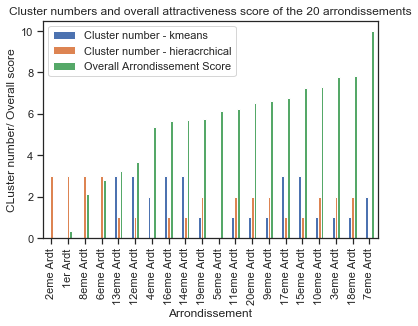

In [338]:
Final_classification_dataframe_with_index_reordered.plot(kind='bar')
plt.title('Cluster numbers and overall attractiveness score of the 20 arrondissements')
plt.xlabel('Arrondissement')
plt.ylabel('CLuster number/ Overall score')
plt.show()

## 7.6 Adding the clusters numbers to the indicators dataframe

In [339]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised

,Hotels,Museums,Bars index,Restaurants index,Theaters index,wealth zscore,realestate zscore,population zscore,15-64 population density,Cumulative_tourism_data,Overall score
0,0.25,0.111111,0.527757,0.632178,1.000000,0.352961,1.000000,0.731998,0.737621,0.000000,0.727461
1,0.00,0.111111,0.685012,0.800306,0.778910,0.485478,0.418934,0.729354,1.000000,0.000000,0.622264
2,0.00,0.111111,1.000000,1.000000,1.000000,0.528230,0.115711,0.437590,0.000000,0.000000,0.365509
3,0.00,0.000000,0.888407,0.565409,1.000000,0.329021,0.000000,0.798942,0.484814,0.000000,0.325870
4,0.15,0.000000,0.873340,0.827930,1.000000,0.534116,0.397743,0.602415,0.455802,0.000000,0.569509
5,0.45,0.000000,0.768607,0.748519,1.000000,0.671212,0.156671,0.922861,0.549387,0.067049,0.724530
6,0.00,0.111111,1.000000,0.974650,1.000000,0.807834,0.252913,0.580033,0.016207,0.080229,0.563732
7,0.40,0.111111,0.862041,0.737613,1.000000,0.592037,0.057280,0.796905,0.626680,0.000000,0.677159
8,0.10,0.000000,0.643890,0.887118,0.875023,0.122461,0.644563,0.862359,0.747405,0.630372,0.780785
9,0.10,0.000000,0.673915,0.872024,1.000000,0.000000,0.777227,0.890232,0.541773,0.000000,0.573856


In [340]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_with_clusters =\
    pd.concat([df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised, Final_classification_dataframe ], axis=1, sort=True)
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_with_clusters

,Hotels,Museums,Bars index,Restaurants index,Theaters index,wealth zscore,realestate zscore,population zscore,15-64 population density,Cumulative_tourism_data,Overall score,Cluster number - kmeans,Overall Arrondissement Score,Cluster number - hieracrchical
0,0.25,0.111111,0.527757,0.632178,1.000000,0.352961,1.000000,0.731998,0.737621,0.000000,0.727461,1,0.727461,2
1,0.00,0.111111,0.685012,0.800306,0.778910,0.485478,0.418934,0.729354,1.000000,0.000000,0.622264,1,0.622264,2
2,0.00,0.111111,1.000000,1.000000,1.000000,0.528230,0.115711,0.437590,0.000000,0.000000,0.365509,3,0.365509,1
3,0.00,0.000000,0.888407,0.565409,1.000000,0.329021,0.000000,0.798942,0.484814,0.000000,0.325870,3,0.325870,1
4,0.15,0.000000,0.873340,0.827930,1.000000,0.534116,0.397743,0.602415,0.455802,0.000000,0.569509,3,0.569509,1
5,0.45,0.000000,0.768607,0.748519,1.000000,0.671212,0.156671,0.922861,0.549387,0.067049,0.724530,3,0.724530,1
6,0.00,0.111111,1.000000,0.974650,1.000000,0.807834,0.252913,0.580033,0.016207,0.080229,0.563732,3,0.563732,1
7,0.40,0.111111,0.862041,0.737613,1.000000,0.592037,0.057280,0.796905,0.626680,0.000000,0.677159,3,0.677159,1
8,0.10,0.000000,0.643890,0.887118,0.875023,0.122461,0.644563,0.862359,0.747405,0.630372,0.780785,1,0.780785,2
9,0.10,0.000000,0.673915,0.872024,1.000000,0.000000,0.777227,0.890232,0.541773,0.000000,0.573856,1,0.573856,2


In [341]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_with_clusters.drop('Overall score', axis=1, inplace=True)

In [342]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_with_clusters

,Hotels,Museums,Bars index,Restaurants index,Theaters index,wealth zscore,realestate zscore,population zscore,15-64 population density,Cumulative_tourism_data,Cluster number - kmeans,Overall Arrondissement Score,Cluster number - hieracrchical
0,0.25,0.111111,0.527757,0.632178,1.000000,0.352961,1.000000,0.731998,0.737621,0.000000,1,0.727461,2
1,0.00,0.111111,0.685012,0.800306,0.778910,0.485478,0.418934,0.729354,1.000000,0.000000,1,0.622264,2
2,0.00,0.111111,1.000000,1.000000,1.000000,0.528230,0.115711,0.437590,0.000000,0.000000,3,0.365509,1
3,0.00,0.000000,0.888407,0.565409,1.000000,0.329021,0.000000,0.798942,0.484814,0.000000,3,0.325870,1
4,0.15,0.000000,0.873340,0.827930,1.000000,0.534116,0.397743,0.602415,0.455802,0.000000,3,0.569509,1
5,0.45,0.000000,0.768607,0.748519,1.000000,0.671212,0.156671,0.922861,0.549387,0.067049,3,0.724530,1
6,0.00,0.111111,1.000000,0.974650,1.000000,0.807834,0.252913,0.580033,0.016207,0.080229,3,0.563732,1
7,0.40,0.111111,0.862041,0.737613,1.000000,0.592037,0.057280,0.796905,0.626680,0.000000,3,0.677159,1
8,0.10,0.000000,0.643890,0.887118,0.875023,0.122461,0.644563,0.862359,0.747405,0.630372,1,0.780785,2
9,0.10,0.000000,0.673915,0.872024,1.000000,0.000000,0.777227,0.890232,0.541773,0.000000,1,0.573856,2


In [343]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_with_clusters.set_index(paris_venues_Nightlife_Hotels_Museums_counts_detail.index)

,Hotels,Museums,Bars index,Restaurants index,Theaters index,wealth zscore,realestate zscore,population zscore,15-64 population density,Cumulative_tourism_data,Cluster number - kmeans,Overall Arrondissement Score,Cluster number - hieracrchical
10eme Ardt,0.25,0.111111,0.527757,0.632178,1.000000,0.352961,1.000000,0.731998,0.737621,0.000000,1,0.727461,2
11eme Ardt,0.00,0.111111,0.685012,0.800306,0.778910,0.485478,0.418934,0.729354,1.000000,0.000000,1,0.622264,2
12eme Ardt,0.00,0.111111,1.000000,1.000000,1.000000,0.528230,0.115711,0.437590,0.000000,0.000000,3,0.365509,1
13eme Ardt,0.00,0.000000,0.888407,0.565409,1.000000,0.329021,0.000000,0.798942,0.484814,0.000000,3,0.325870,1
14eme Ardt,0.15,0.000000,0.873340,0.827930,1.000000,0.534116,0.397743,0.602415,0.455802,0.000000,3,0.569509,1
15eme Ardt,0.45,0.000000,0.768607,0.748519,1.000000,0.671212,0.156671,0.922861,0.549387,0.067049,3,0.724530,1
16eme Ardt,0.00,0.111111,1.000000,0.974650,1.000000,0.807834,0.252913,0.580033,0.016207,0.080229,3,0.563732,1
17eme Ardt,0.40,0.111111,0.862041,0.737613,1.000000,0.592037,0.057280,0.796905,0.626680,0.000000,3,0.677159,1
18eme Ardt,0.10,0.000000,0.643890,0.887118,0.875023,0.122461,0.644563,0.862359,0.747405,0.630372,1,0.780785,2
19eme Ardt,0.10,0.000000,0.673915,0.872024,1.000000,0.000000,0.777227,0.890232,0.541773,0.000000,1,0.573856,2


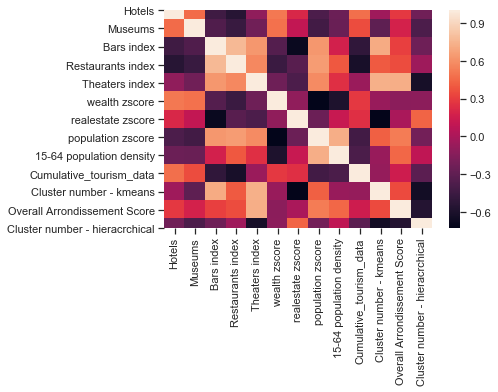

In [344]:
#import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline

# load the R package ISLR
#infert = com.importr("ISLR")

# load the Auto dataset
#auto_df = com.load_data('Auto')

# calculate the correlation matrix
corr = df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_with_clusters.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [345]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_with_clusters.corr()

,Hotels,Museums,Bars index,Restaurants index,Theaters index,wealth zscore,realestate zscore,population zscore,15-64 population density,Cumulative_tourism_data,Cluster number - kmeans,Overall Arrondissement Score,Cluster number - hieracrchical
Hotels,1.000000,0.462793,-0.440720,-0.549991,-0.102086,0.509861,0.209074,-0.378813,-0.247881,0.480912,-0.040908,0.283933,-0.228569
Museums,0.462793,1.000000,-0.365813,-0.463513,-0.230904,0.483252,0.098052,-0.423429,-0.257317,0.354892,-0.302809,0.181818,-0.377325
Bars index,-0.440720,-0.365813,1.000000,0.774568,0.632447,-0.346183,-0.682174,0.632608,0.174845,-0.506213,0.715262,0.309080,-0.236627
Restaurants index,-0.549991,-0.463513,0.774568,1.000000,0.571594,-0.458890,-0.333861,0.653295,0.397749,-0.612963,0.403759,0.353461,-0.047401
Theaters index,-0.102086,-0.230904,0.632447,0.571594,1.000000,-0.236713,-0.377615,0.586119,0.251663,-0.060780,0.734522,0.726006,-0.618098
wealth zscore,0.509861,0.483252,-0.346183,-0.458890,-0.236713,1.000000,-0.099639,-0.725623,-0.586270,0.280517,-0.065727,-0.123985,-0.117373
realestate zscore,0.209074,0.098052,-0.682174,-0.333861,-0.377615,-0.099639,1.000000,-0.248200,0.122993,0.249031,-0.713805,-0.000611,0.438144
population zscore,-0.378813,-0.423429,0.632608,0.653295,0.586119,-0.725623,-0.248200,1.000000,0.724531,-0.423056,0.420423,0.527477,-0.214756
15-64 population density,-0.247881,-0.257317,0.174845,0.397749,0.251663,-0.586270,0.122993,0.724531,1.000000,-0.384116,-0.066121,0.450784,0.086483
Cumulative_tourism_data,0.480912,0.354892,-0.506213,-0.612963,-0.060780,0.280517,0.249031,-0.423056,-0.384116,1.000000,-0.084549,0.147873,-0.321075


In [353]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_with_clusters.groupby('Cluster number - kmeans').mean()

,Hotels,Museums,Bars index,Restaurants index,Theaters index,wealth zscore,realestate zscore,population zscore,15-64 population density,Cumulative_tourism_data,Overall Arrondissement Score,Cluster number - hieracrchical
Cluster number - kmeans,,,,,,,,,,,,
0,0.270000,0.333333,0.277899,0.411769,0.388472,0.769790,0.668508,0.178050,0.232780,0.226361,0.228500,2.4
1,0.142857,0.095238,0.621549,0.782960,0.876017,0.347663,0.749715,0.786962,0.716990,0.090053,0.685442,2.0
2,0.575000,0.388889,0.248114,0.298172,1.000000,0.822139,0.715841,0.269312,0.185426,0.972779,0.768986,0.0
3,0.166667,0.055556,0.898732,0.809020,1.000000,0.577075,0.163386,0.689791,0.355482,0.024546,0.537718,1.0


In [354]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_with_clusters.groupby('Cluster number - hieracrchical').mean()

,Hotels,Museums,Bars index,Restaurants index,Theaters index,wealth zscore,realestate zscore,population zscore,15-64 population density,Cumulative_tourism_data,Cluster number - kmeans,Overall Arrondissement Score
Cluster number - hieracrchical,,,,,,,,,,,,
0,0.483333,0.592593,0.270234,0.359160,0.862523,0.798947,0.631350,0.330625,0.266661,0.717670,1.333333,0.717860
1,0.166667,0.055556,0.898732,0.809020,1.000000,0.577075,0.163386,0.689791,0.355482,0.024546,3.000000,0.537718
2,0.142857,0.095238,0.621549,0.782960,0.876017,0.347663,0.749715,0.786962,0.716990,0.090053,1.000000,0.685442
3,0.262500,0.166667,0.268755,0.394428,0.338697,0.774097,0.720043,0.109250,0.183693,0.231089,0.000000,0.131723


## Next let's construct a bubble chart to visualise some of the results

In [348]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble = df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_with_clusters.set_index(paris_venues_Nightlife_Hotels_Museums_counts_detail.index)
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble['Arrondissement number'] = df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble.index
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble

,Hotels,Museums,Bars index,Restaurants index,Theaters index,wealth zscore,realestate zscore,population zscore,15-64 population density,Cumulative_tourism_data,Cluster number - kmeans,Overall Arrondissement Score,Cluster number - hieracrchical,Arrondissement number
10eme Ardt,0.25,0.111111,0.527757,0.632178,1.000000,0.352961,1.000000,0.731998,0.737621,0.000000,1,0.727461,2,10eme Ardt
11eme Ardt,0.00,0.111111,0.685012,0.800306,0.778910,0.485478,0.418934,0.729354,1.000000,0.000000,1,0.622264,2,11eme Ardt
12eme Ardt,0.00,0.111111,1.000000,1.000000,1.000000,0.528230,0.115711,0.437590,0.000000,0.000000,3,0.365509,1,12eme Ardt
13eme Ardt,0.00,0.000000,0.888407,0.565409,1.000000,0.329021,0.000000,0.798942,0.484814,0.000000,3,0.325870,1,13eme Ardt
14eme Ardt,0.15,0.000000,0.873340,0.827930,1.000000,0.534116,0.397743,0.602415,0.455802,0.000000,3,0.569509,1,14eme Ardt
15eme Ardt,0.45,0.000000,0.768607,0.748519,1.000000,0.671212,0.156671,0.922861,0.549387,0.067049,3,0.724530,1,15eme Ardt
16eme Ardt,0.00,0.111111,1.000000,0.974650,1.000000,0.807834,0.252913,0.580033,0.016207,0.080229,3,0.563732,1,16eme Ardt
17eme Ardt,0.40,0.111111,0.862041,0.737613,1.000000,0.592037,0.057280,0.796905,0.626680,0.000000,3,0.677159,1,17eme Ardt
18eme Ardt,0.10,0.000000,0.643890,0.887118,0.875023,0.122461,0.644563,0.862359,0.747405,0.630372,1,0.780785,2,18eme Ardt
19eme Ardt,0.10,0.000000,0.673915,0.872024,1.000000,0.000000,0.777227,0.890232,0.541773,0.000000,1,0.573856,2,19eme Ardt


In [349]:
cluster.labels_

array([2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 3, 0, 3, 2],
      dtype=int64)

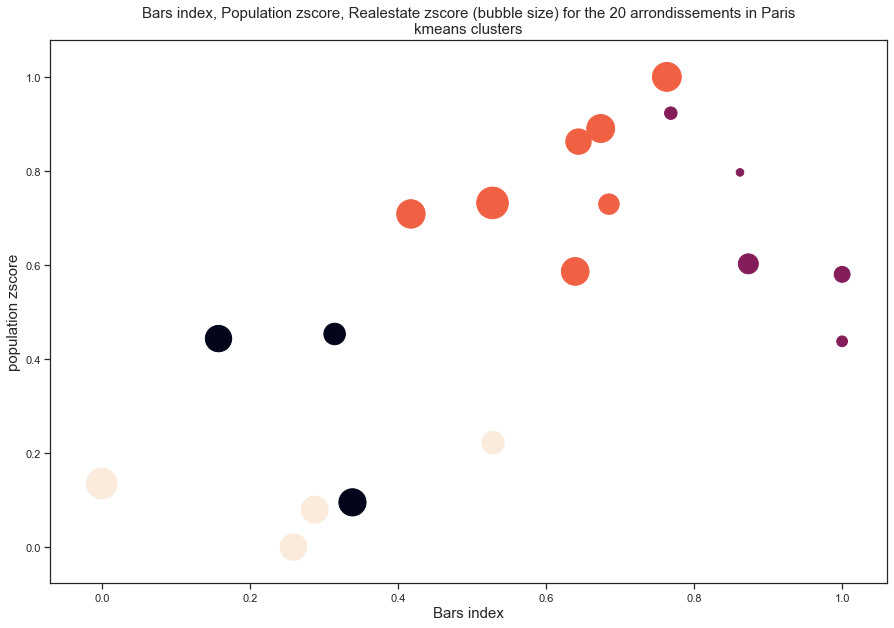

In [350]:
plt.figure(figsize=(15, 10))  
plt.scatter(x=df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble['Bars index'],\
                y=df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble['population zscore'],\
                    s = df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble['realestate zscore']*1000,\
                        c=cluster.labels_, alpha=1)
plt.title('Bars index, Population zscore, Realestate zscore (bubble size) for the 20 arrondissements in Paris\nkmeans clusters', fontsize = 15)
plt.xlabel('Bars index', fontsize = 15)
plt.ylabel('population zscore', fontsize = 15)
plt.show()

#x, y = df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble['Bars index'],\
 #   df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble['population zscore']



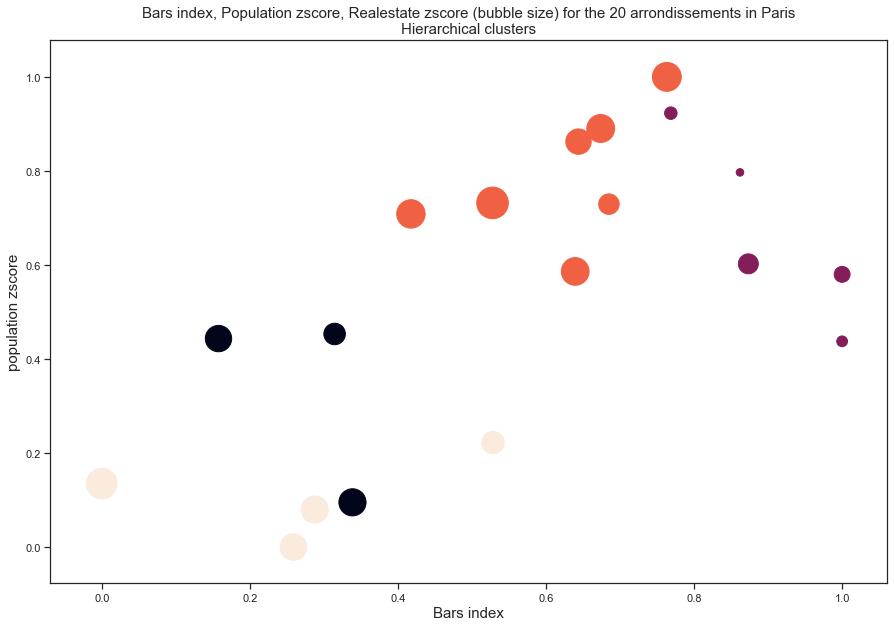

In [351]:
plt.figure(figsize=(15, 10))  
plt.scatter(x=df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble['Bars index'],\
                y=df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble['population zscore'],\
                    s = df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble['realestate zscore']*1000,\
                        c=cluster_number_hierarchical, alpha=1)
plt.title('Bars index, Population zscore, Realestate zscore (bubble size) for the 20 arrondissements in Paris\nHierarchical clusters', fontsize = 15)
plt.xlabel('Bars index', fontsize = 15)
plt.ylabel('population zscore', fontsize = 15)
plt.show()

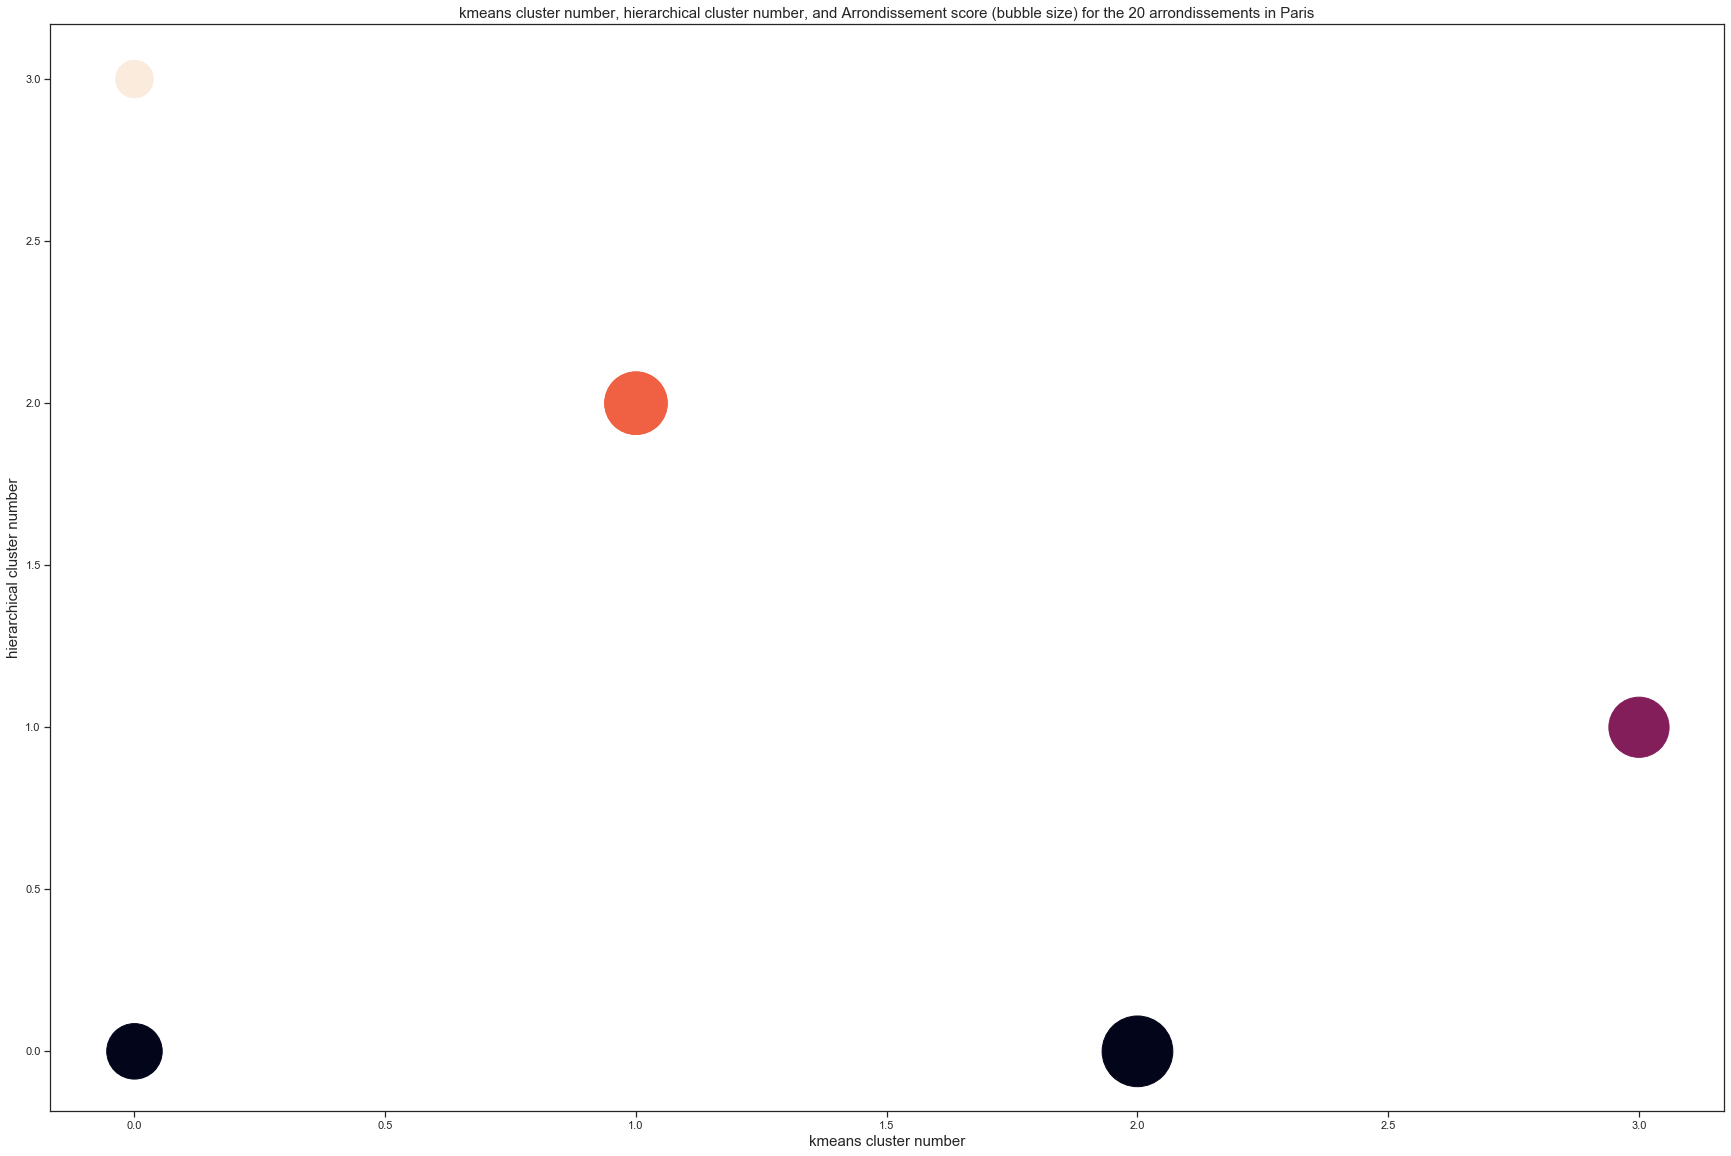

In [352]:
plt.figure(figsize=(30, 20))  
plt.scatter(x=df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble['Cluster number - kmeans'],\
                y=df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble['Cluster number - hieracrchical'],\
                    s = df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble['Overall Arrondissement Score']*5000,\
                        c=cluster_number_hierarchical, alpha=1)
plt.title('kmeans cluster number, hierarchical cluster number, and Arrondissement score (bubble size) for the 20 arrondissements in Paris', fontsize = 15)
plt.xlabel('kmeans cluster number', fontsize = 15)
plt.ylabel('hierarchical cluster number', fontsize = 15)
plt.show()

## A bar chart of the overall score

In [ ]:
paris_venues_Nightlife_Hotels_Museums_counts_detail.plot(y = ['Bars', 'Restaurants'], kind='bar')
plt.title('Nightlife venues in Paris')
plt.xlabel('Arrondissement')
plt.ylabel('Count')
plt.show()

In [355]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_with_clusters

,Hotels,Museums,Bars index,Restaurants index,Theaters index,wealth zscore,realestate zscore,population zscore,15-64 population density,Cumulative_tourism_data,Cluster number - kmeans,Overall Arrondissement Score,Cluster number - hieracrchical
0,0.25,0.111111,0.527757,0.632178,1.000000,0.352961,1.000000,0.731998,0.737621,0.000000,1,0.727461,2
1,0.00,0.111111,0.685012,0.800306,0.778910,0.485478,0.418934,0.729354,1.000000,0.000000,1,0.622264,2
2,0.00,0.111111,1.000000,1.000000,1.000000,0.528230,0.115711,0.437590,0.000000,0.000000,3,0.365509,1
3,0.00,0.000000,0.888407,0.565409,1.000000,0.329021,0.000000,0.798942,0.484814,0.000000,3,0.325870,1
4,0.15,0.000000,0.873340,0.827930,1.000000,0.534116,0.397743,0.602415,0.455802,0.000000,3,0.569509,1
5,0.45,0.000000,0.768607,0.748519,1.000000,0.671212,0.156671,0.922861,0.549387,0.067049,3,0.724530,1
6,0.00,0.111111,1.000000,0.974650,1.000000,0.807834,0.252913,0.580033,0.016207,0.080229,3,0.563732,1
7,0.40,0.111111,0.862041,0.737613,1.000000,0.592037,0.057280,0.796905,0.626680,0.000000,3,0.677159,1
8,0.10,0.000000,0.643890,0.887118,0.875023,0.122461,0.644563,0.862359,0.747405,0.630372,1,0.780785,2
9,0.10,0.000000,0.673915,0.872024,1.000000,0.000000,0.777227,0.890232,0.541773,0.000000,1,0.573856,2


### Reordering the dataframe according to the tourism data, bars index, and reals-estate index

In [357]:
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble =\
    df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble.sort_values(["Cumulative_tourism_data", "Bars index","realestate zscore","wealth zscore"], ascending = (False, False, False, False))
df_paris_Nightlife_Hotels_Museums_wealth_realestate_population_other_socioecon_data_normalised_bubble

,Hotels,Museums,Bars index,Restaurants index,Theaters index,wealth zscore,realestate zscore,population zscore,15-64 population density,Cumulative_tourism_data,Cluster number - kmeans,Overall Arrondissement Score,Cluster number - hieracrchical,Arrondissement number
4eme Ardt,0.15,0.111111,0.157628,0.275228,1.000000,0.644277,0.693803,0.443448,0.265569,1.000000,2,0.537972,0,4eme Ardt
7eme Ardt,1.00,0.666667,0.338600,0.321116,1.000000,1.000000,0.737878,0.095176,0.105283,0.945559,2,1.000000,0,7eme Ardt
18eme Ardt,0.10,0.000000,0.643890,0.887118,0.875023,0.122461,0.644563,0.862359,0.747405,0.630372,1,0.780785,2,18eme Ardt
1er Ardt,0.35,0.444444,0.287648,0.000000,0.000000,0.707303,0.731103,0.079737,0.011826,0.523209,0,0.032995,3,1er Ardt
8eme Ardt,0.40,0.111111,0.258954,0.338439,0.554166,0.915989,0.707504,0.000000,0.019993,0.401146,0,0.212883,3,8eme Ardt
5eme Ardt,0.30,1.000000,0.314475,0.481135,0.587569,0.752564,0.462368,0.453250,0.429131,0.207450,0,0.615608,0,5eme Ardt
16eme Ardt,0.00,0.111111,1.000000,0.974650,1.000000,0.807834,0.252913,0.580033,0.016207,0.080229,3,0.563732,1,16eme Ardt
15eme Ardt,0.45,0.000000,0.768607,0.748519,1.000000,0.671212,0.156671,0.922861,0.549387,0.067049,3,0.724530,1,15eme Ardt
12eme Ardt,0.00,0.111111,1.000000,1.000000,1.000000,0.528230,0.115711,0.437590,0.000000,0.000000,3,0.365509,1,12eme Ardt
13eme Ardt,0.00,0.000000,0.888407,0.565409,1.000000,0.329021,0.000000,0.798942,0.484814,0.000000,3,0.325870,1,13eme Ardt
